# Telecom Churn Case Study

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.


# Business Goal of the Project
 
 The main goal of the case study is to analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.


# Objective of the Project


1. Analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.
2. Build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

The main goal of the case study is to build ML models to predict churn. The predictive model that we have to build will the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on your observations.



# Other important points

1. Note that it's highly likely that you'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2.  Since here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model. 

2. The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components that are not easy to interpret.

3. Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. 

# Data Dictionary

Acronyms	Description

    CIRCLE_ID	Telecom circle area to which the customer belongs to
    LOC	Local calls  within same telecom circle
    STD	STD calls  outside the calling circle
    IC	Incoming calls
    OG	Outgoing calls
    T2T	Operator T to T ie within same operator mobile to mobile
    T2M    	Operator T to other operator mobile
    T2O    	Operator T to other operator fixed line
    T2F    	Operator T to fixed lines of T
    T2C    	Operator T to its own call center
    ARPU    	Average revenue per user
    MOU    	Minutes of usage  voice calls
    AON    	Age on network  number of days the customer is using the operator T network
    ONNET   	All kind of calls within the same operator network
    OFFNET    	All kind of calls outside the operator T network
    ROAM	Indicates that customer is in roaming zone during the call
    SPL   	Special calls
    ISD    	ISD calls
    RECH    	Recharge
    NUM    	Number
    AMT    	Amount in local currency
    MAX    	Maximum
    DATA    	Mobile internet
    3G    	G network
    AV    	Average
    VOL    	Mobile internet usage volume in MB
    2G    	G network
    PCK    	Prepaid service schemes called  PACKS
    NIGHT    	Scheme to use during specific night hours only
    MONTHLY    	Service schemes with validity equivalent to a month
    SACHET   	Service schemes with validity smaller than a month
    *.6    	KPI for the month of June
    *.7    	KPI for the month of July
    *.8    	KPI for the month of August
    FB_USER	Service scheme to avail services of Facebook and similar social networking sites
    VBC    	Volume based cost  when no specific scheme is not purchased and paid as per usage

In [569]:
# Import necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler

#Import library for splitting the data into train and test data
from sklearn.model_selection import train_test_split

#Import library for Logistic Regression modelling
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Import library for evaluation of the model
from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import Library for PCA
from sklearn.decomposition import PCA

#Import Library for Incremental PCA
from sklearn.decomposition import IncrementalPCA



# Libraries for Random Forest

# Libraries for Ensemble

# Libraries for Evaluation metrics


# Read and Understand the Dataset

In [570]:
# Read the train and test data
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

In [571]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [572]:
train_data.shape

(69999, 172)

In [573]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [574]:
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

# Find the % of missing values in each column
print(100*train_data.isnull().sum()/train_data.shape[0])

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [575]:
#Find the % of missing values of each row
row_null = 100 * train_data.isnull().sum(axis=1)/train_data.shape[1]
row_null[row_null> 70] # Display the rows which has more than 70% of null values

296      72.093023
423      70.348837
569      72.093023
642      70.348837
658      71.511628
1245     71.511628
2001     71.511628
2115     72.093023
2324     72.674419
2423     72.093023
2512     71.511628
3103     72.093023
3198     72.093023
3625     72.093023
3679     71.511628
4063     71.511628
4213     71.511628
4590     72.093023
4597     72.093023
4668     72.093023
4681     72.093023
4729     71.511628
4855     71.511628
4973     70.348837
5479     72.093023
5706     72.674419
5827     72.093023
5832     72.093023
6153     70.348837
6359     72.093023
6427     70.348837
6961     72.093023
7137     72.093023
7242     72.093023
7261     70.348837
7291     72.674419
7436     71.511628
7450     72.093023
7451     72.674419
7709     72.093023
7879     72.093023
7987     72.093023
8436     70.348837
8764     70.930233
8984     72.093023
9120     71.511628
9241     72.093023
9358     70.348837
9460     72.093023
9548     72.093023
9715     71.511628
9737     72.674419
10635    70.

In [576]:
# Display all the columns which has single value. 
train_data.nunique()[train_data.nunique() == 1]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

# Data Cleaning

In [577]:
# Check the columns'date_of_last_rech_6','last_day_rch_amt_6','date_of_last_rech_data_6','av_rech_amt_data_6' for 'date_of_last_rech_6' is null
train_data[['date_of_last_rech_6','last_day_rch_amt_6','date_of_last_rech_data_6','av_rech_amt_data_6']][train_data['date_of_last_rech_6'].isnull()].head(20)

,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,av_rech_amt_data_6
28,NaN,0,NaN,NaN
95,NaN,0,NaN,NaN
293,NaN,0,NaN,NaN
351,NaN,0,NaN,NaN
498,NaN,0,NaN,NaN
503,NaN,0,NaN,NaN
658,NaN,0,NaN,NaN
888,NaN,0,NaN,NaN
914,NaN,0,NaN,NaN
964,NaN,0,NaN,NaN


In [578]:
# Check the columns'date_of_last_rech_6','last_day_rch_amt_6','date_of_last_rech_data_6','av_rech_amt_data_6' for 'last_day_rch_amt_6' is 0
train_data[['date_of_last_rech_6','last_day_rch_amt_6','date_of_last_rech_data_6','av_rech_amt_data_6']][train_data['last_day_rch_amt_6']==0].head(20)

,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,av_rech_amt_data_6
1,6/12/2014,0,NaN,NaN
15,6/27/2014,0,6/16/2014,154.0
19,6/28/2014,0,NaN,NaN
26,6/14/2014,0,NaN,NaN
28,NaN,0,NaN,NaN
30,6/20/2014,0,NaN,NaN
37,6/14/2014,0,NaN,NaN
44,6/29/2014,0,NaN,NaN
46,6/27/2014,0,NaN,NaN
51,6/30/2014,0,NaN,NaN


**Observation**

1. 'date_of_last_rech_6' column having null value means not recharged on that month.
2. date_of_last_rech_data_6 and av_rech_amt_data_6 columns we can drop because it has more than 70% of null values.These columns will not help in our analysis.

# Drop the columns which has more than 70% of missing values

In [579]:
# Display all the columns which has more than 70% of missing values
column_null = 100 * train_data.isnull().sum()/train_data.shape[0] 
column_null[column_null>70]

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_user_7            74.478207
night_pck_us

In [580]:
column_null[column_null>70].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [581]:
# Drop the columns which has more than 70% of missing values
train_data = train_data.drop(column_null[column_null>70].index,axis=1)

In [582]:
train_data.shape

(69999, 142)

# Drop the columns which has single value

In [583]:
#Single value columns
single_value_columns = train_data.nunique()[train_data.nunique() == 1].index

In [584]:
# remove all the columns which has single value, we don't need those columns for our analysis

train_data = train_data.drop(single_value_columns,axis=1)

In [585]:
train_data.shape

(69999, 129)

In [586]:
100*train_data.isnull().sum()/train_data.shape[0]

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t

In [587]:
##############################################

In [588]:
#Find the % of missing values of each row
row_null = 100 * train_data.isnull().sum(axis=1)/train_data.shape[1]
len(row_null[row_null> 50]) # Display the rows which has more than 50% of null values

758

In [589]:
# Find the churn_probability for missing value rows
temp_rows = train_data.iloc[row_null[row_null>50].index,:]
temp_rows['churn_probability'].value_counts()

1    539
0    219
Name: churn_probability, dtype: int64

In [590]:
train_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [591]:
#########################################

In [592]:
# Get the categorical variables
cat_var = train_data.select_dtypes('object').columns
# Get the Numerical variables
num_var = train_data.drop(cat_var,axis=1).columns

In [593]:
print("Categorical variables",cat_var)
print("Numerical variables", num_var)

Categorical variables Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')
Numerical variables Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=126)


In [594]:
# Display the value counts of all categorical columns
for i in cat_var:
    print(i)
    print(train_data[i].value_counts())
    print("----------------------------------------- ")

date_of_last_rech_6
6/30/2014    11880
6/29/2014     9049
6/27/2014     7800
6/28/2014     6752
6/26/2014     3918
6/25/2014     3402
6/24/2014     2888
6/17/2014     2887
6/14/2014     2686
6/21/2014     2654
6/23/2014     2060
6/18/2014     1886
6/12/2014     1746
6/22/2014     1624
6/13/2014     1468
6/19/2014     1387
6/20/2014     1252
6/16/2014      783
6/15/2014      605
6/11/2014      398
6/8/2014       368
6/5/2014       229
6/7/2014       223
6/10/2014      200
6/3/2014       172
6/1/2014       155
6/9/2014       135
6/6/2014       123
6/4/2014        90
6/2/2014        78
Name: date_of_last_rech_6, dtype: int64
----------------------------------------- 
date_of_last_rech_7
7/31/2014    12206
7/30/2014     9716
7/25/2014     6577
7/29/2014     6320
7/28/2014     5370
7/27/2014     4136
7/26/2014     3765
7/24/2014     2750
7/19/2014     2144
7/22/2014     2061
7/20/2014     1999
7/17/2014     1915
7/16/2014     1687
7/23/2014     1590
7/21/2014     1138
7/15/2014     1102
7/1

**Observation**

1. In our dataset we have Jun, July and August months information of telecom firm customers of the year 2014.
2. Columns date_of_last_rech_6 is June month information, date_of_last_rech_7 is July month information, date_of_last_rech_8, is August month information.

**Decision:**

   We can delete the date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8 from our dataset. Because date of last recharge on that month will not help much in predicting churn cases.


In [595]:
# Drop the date columns date_of_last_rech_6, date_of_last_rech_7,date_of_last_rech_8 which we already considered
date_list = ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']
train_data = train_data.drop(date_list,axis=1)

In [596]:
# Find the % of missing values in each column
print(100*train_data.isnull().sum()/train_data.shape[0])

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t

# Data Imputation

In [597]:
# Find the % of missing values in each column
print(100*train_data.isnull().sum()/train_data.shape[0])

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t

In [598]:
# Display the columns which has missing values
column_null = 100*train_data.isnull().sum()/train_data.shape[0]
null_col_name = column_null[column_null!=0].index
print(column_null[column_null!=0])
print(len(column_null[column_null!=0]))

onnet_mou_6         3.954342
onnet_mou_7         3.838626
onnet_mou_8         5.290076
offnet_mou_6        3.954342
offnet_mou_7        3.838626
offnet_mou_8        5.290076
roam_ic_mou_6       3.954342
roam_ic_mou_7       3.838626
roam_ic_mou_8       5.290076
roam_og_mou_6       3.954342
roam_og_mou_7       3.838626
roam_og_mou_8       5.290076
loc_og_t2t_mou_6    3.954342
loc_og_t2t_mou_7    3.838626
loc_og_t2t_mou_8    5.290076
loc_og_t2m_mou_6    3.954342
loc_og_t2m_mou_7    3.838626
loc_og_t2m_mou_8    5.290076
loc_og_t2f_mou_6    3.954342
loc_og_t2f_mou_7    3.838626
loc_og_t2f_mou_8    5.290076
loc_og_t2c_mou_6    3.954342
loc_og_t2c_mou_7    3.838626
loc_og_t2c_mou_8    5.290076
loc_og_mou_6        3.954342
loc_og_mou_7        3.838626
loc_og_mou_8        5.290076
std_og_t2t_mou_6    3.954342
std_og_t2t_mou_7    3.838626
std_og_t2t_mou_8    5.290076
std_og_t2m_mou_6    3.954342
std_og_t2m_mou_7    3.838626
std_og_t2m_mou_8    5.290076
std_og_t2f_mou_6    3.954342
std_og_t2f_mou

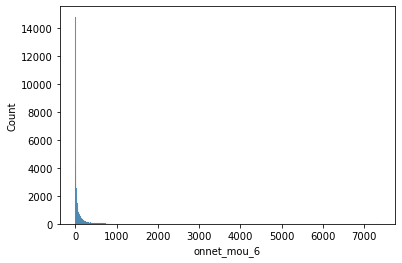

In [599]:
sns.histplot(train_data['onnet_mou_6'])
plt.show()

In [600]:
train_data['onnet_mou_6'].mean()

133.15327467984406

In [601]:
train_data['onnet_mou_6'].median()

34.11

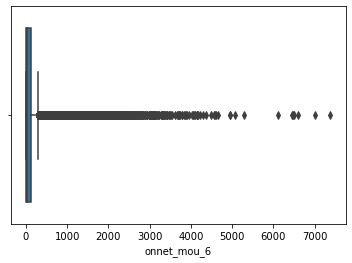

In [602]:
sns.boxplot(data = train_data,x = 'onnet_mou_6')
plt.show()

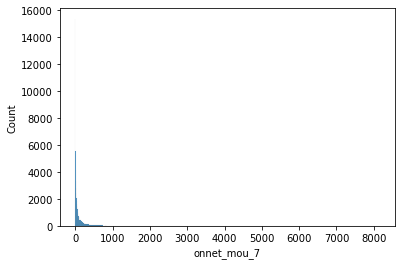

In [603]:
sns.histplot(train_data['onnet_mou_7'])
plt.show()

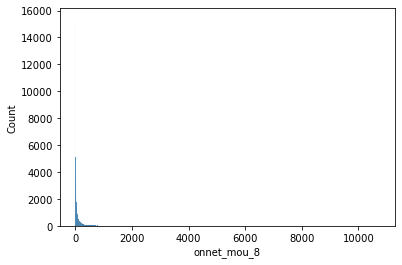

In [604]:
sns.histplot(train_data['onnet_mou_8'])
plt.show()

In [605]:
train_data[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257
std,299.963093,311.277193,311.896596
min,0.000000,0.000000,0.000000
25%,7.410000,6.675000,6.410000
50%,34.110000,32.280000,32.100000
75%,119.390000,115.837500,115.060000
max,7376.710000,8157.780000,10752.560000


In [606]:
# Check the statistical values of columns which has null values
train_data[null_col_name].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,...,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,...,33.077030,0.061932,0.033371,0.040392,7.394167,8.171162,8.348424,0.854063,1.019680,0.963214
std,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,55.960985,53.408135,73.469261,...,108.469864,0.164823,0.137322,0.148417,60.951165,63.604165,63.097570,12.149144,13.225373,11.697686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.410000,6.675000,6.410000,34.860000,32.240000,31.575000,0.000000,0.000000,0.000000,0.000000,...,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,0.000000,0.000000,0.000000,0.000000,...,5.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119.390000,115.837500,115.060000,232.990000,227.630000,229.345000,0.000000,0.000000,0.000000,0.000000,...,27.615000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,4155.830000,4169.810000,3775.110000,...,5658.740000,19.760000,13.460000,16.860000,6789.410000,5289.540000,4127.010000,1362.940000,1495.940000,1209.860000


**Observation**

The above statistical data shows that all the columns has outliers so we can use the median (50th percentile ) to replace the null values of these columns.

In [607]:
# Replace all the null values of the above columns with median value 
for i in null_col_name:
    median = train_data[i].median()
    train_data[i].fillna(median,inplace = True)

In [608]:
# Check the dataset for null values
100 * train_data.isnull().sum()/train_data.shape[0]

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

# EDA and Data Analysis

In [609]:
# Check the churn probability for the median of total recharge amount 
train_data.groupby('churn_probability').total_rech_amt_6.median()

churn_probability
0    228
1    236
Name: total_rech_amt_6, dtype: int64

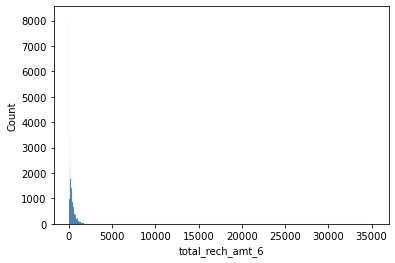

In [610]:
#Plot the histogram of total_rech_amt_6
sns.histplot(data = train_data,x ='total_rech_amt_6')
plt.show()

In [611]:
train_data.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,334.213918,344.366927,351.924315,294.605405,305.867956,304.373330,311.131642,316.878225,316.270571,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


# Descriptive Statistical Analysis

In [612]:
# Display the Descriptive Statistical Information
train_data.describe(percentiles=[0.01,.05,0.1,.2,.25,.5,.75,.8,.9,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,334.213918,344.366927,351.924315,294.605405,305.867956,304.373330,311.131642,316.878225,316.270571,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
1%,699.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.00000,0.000000
5%,3499.900000,1.500000,0.919000,0.000000,0.000000,0.000000,0.000000,0.960000,0.760000,0.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,0.000000,0.00000,0.000000
10%,6999.800000,32.248600,29.761200,18.210600,0.360000,0.250000,0.210000,7.960000,7.010000,6.480000,...,0.000000,0.000000,0.000000,0.000000,0.000000,286.000000,0.000000,0.000000,0.00000,0.000000
20%,13999.600000,74.710600,69.075600,64.199200,4.810000,4.230000,4.260000,26.740000,24.510000,24.340000,...,0.000000,0.000000,0.000000,0.000000,0.000000,401.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000


**Fact**

   **High value customers, who are regular in recharging, recharge with high amount, high usage of the services and they will prefer to take long term packages.

   1. Average revenue per unit (ARPU) measures the earnings generated per user. 

    Some important columns are 

   1. June month columns: 

    'total_rech_num_6','total_rech_amt_6','max_rech_amt_6','last_day_rch_amt_6','total_ic_mou_6','total_og_mou_6'

   2. July month columns:

    'total_rech_num_7','total_rech_amt_7','max_rech_amt_7','last_day_rch_amt_7','total_ic_mou_7','total_og_mou_7',

   3. August month columns: 
   
     'total_rech_num_8','total_rech_amt_8','max_rech_amt_8','last_day_rch_amt_8','total_ic_mou_8','total_og_mou_8'


In [613]:
train_data[['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']].describe(percentiles=[0.01,.05,0.1,.2,.25,.5,.75,.8,.9,.95,.99])

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,63.426949,59.294218,62.489478
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,97.954876,95.429492,101.996729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,3.000000,3.000000,2.000000,80.000000,65.000000,60.000000,30.000000,30.000000,26.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,30.000000,30.000000,30.000000


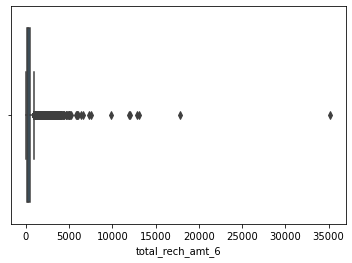

In [614]:
sns.boxplot(data = train_data,x= 'total_rech_amt_6')
plt.show()

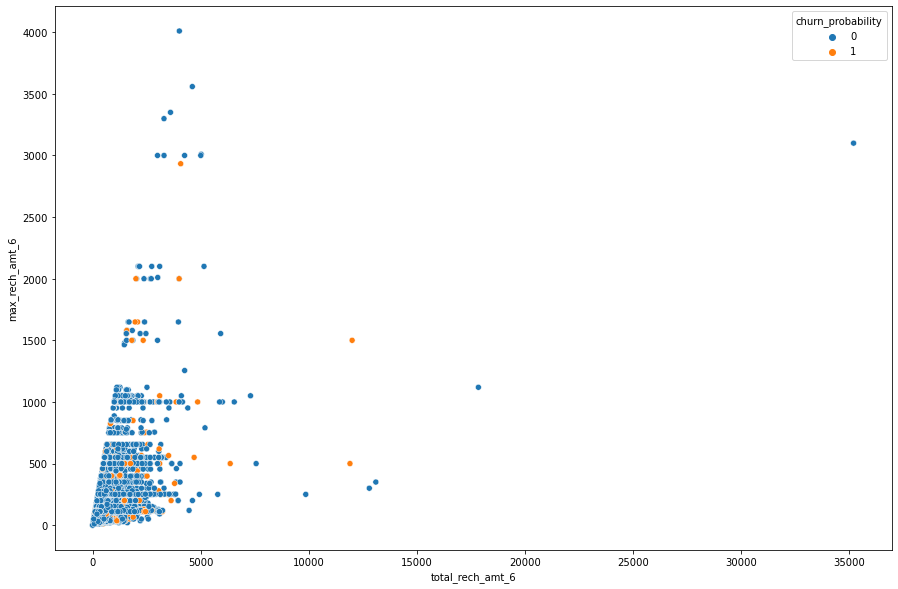

In [615]:
# Scatter plot for June month'total_rech_amt_6' and 'max_rech_amt_6'
plt.figure(figsize=(15,10))
sns.scatterplot(data = train_data,x = 'total_rech_amt_6',y='max_rech_amt_6', hue ='churn_probability')
plt.show()

**Observation**

Many customers are recharging high amount, looks like outlier points. But they are the high profitable customer. We should not allow those customer to churn.

Here the total recharge amount of June month is important than max amount recharge on that month.


In [616]:
train_data.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,1.000000,0.000225,0.003596,0.003855,0.002694,0.006079,0.002635,-0.007576,-0.005042,-0.004057,...,0.003371,0.004540,0.001200,0.000165,-0.000313,-0.000702,0.006768,0.004040,0.003071,-0.001669
arpu_6,0.000225,1.000000,0.743730,0.643193,0.448464,0.324367,0.260325,0.611666,0.455601,0.361843,...,0.186164,0.179641,0.085993,0.066930,0.050399,0.025875,0.168365,0.184225,0.217785,0.025351
arpu_7,0.003596,0.743730,1.000000,0.782332,0.320306,0.429194,0.341899,0.464633,0.596208,0.465589,...,0.274479,0.204451,0.061984,0.094972,0.065798,0.023818,0.189943,0.218318,0.171154,-0.057809
arpu_8,0.003855,0.643193,0.782332,1.000000,0.241351,0.326063,0.421101,0.370681,0.468942,0.590380,...,0.198271,0.278965,0.051960,0.069332,0.099576,0.033256,0.224868,0.177637,0.157545,-0.157566
onnet_mou_6,0.002694,0.448464,0.320306,0.241351,1.000000,0.733869,0.597803,0.198862,0.143492,0.115337,...,0.001481,-0.003861,-0.001246,0.008561,-0.008027,-0.037880,-0.011634,-0.011124,-0.006776,0.047915
onnet_mou_7,0.006079,0.324367,0.429194,0.326063,0.733869,1.000000,0.787487,0.154464,0.192667,0.153440,...,0.006147,-0.003094,-0.004892,0.001678,-0.003264,-0.039066,-0.008471,-0.007196,-0.011344,-0.008099
onnet_mou_8,0.002635,0.260325,0.341899,0.421101,0.597803,0.787487,1.000000,0.132497,0.164019,0.195111,...,0.005338,0.001408,-0.004706,0.007992,0.001012,-0.035631,-0.003689,-0.006943,-0.006914,-0.071568
offnet_mou_6,-0.007576,0.611666,0.464633,0.370681,0.198862,0.154464,0.132497,1.000000,0.740488,0.573433,...,0.025424,0.027263,0.001520,-0.001848,-0.002174,0.004003,0.017488,0.017396,0.023591,0.028187
offnet_mou_7,-0.005042,0.455601,0.596208,0.468942,0.143492,0.192667,0.164019,0.740488,1.000000,0.755700,...,0.031204,0.027010,-0.002548,0.000912,-0.001043,-0.005929,0.015918,0.014396,0.010160,-0.029543
offnet_mou_8,-0.004057,0.361843,0.465589,0.590380,0.115337,0.153440,0.195111,0.573433,0.755700,1.000000,...,0.030145,0.038309,-0.001482,0.002024,0.009956,-0.003103,0.023485,0.015729,0.011707,-0.096774


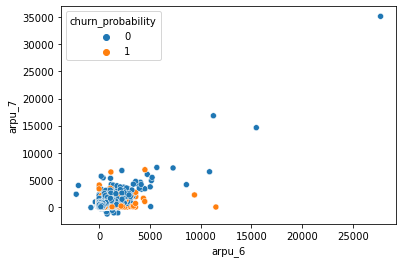

In [617]:
plt.subplot()
sns.scatterplot(data =train_data,x = 'arpu_6',y ='arpu_7',hue='churn_probability')
plt.show()

In [618]:
train_data.groupby('churn_probability').arpu_7.median()

churn_probability
0    198.916
1    118.348
Name: arpu_7, dtype: float64

In [619]:
train_data.groupby('churn_probability').arpu_8.median()

churn_probability
0    210.0260
1      9.9695
Name: arpu_8, dtype: float64

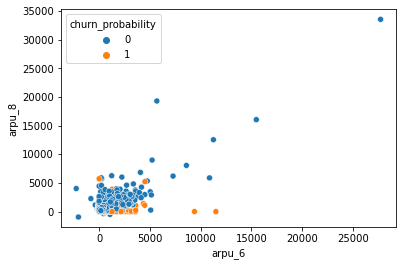

In [620]:
plt.subplot()
sns.scatterplot(data =train_data,x = 'arpu_6',y ='arpu_8',hue='churn_probability')
plt.show()

**Observation**

All most all the columns has outlier values. We need to give outlier treatment to those columns which has outliers.

In [621]:
train_data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=126)

In [622]:
corr = train_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.743730
arpu_8              arpu_6              0.643193
                    arpu_7              0.782332
onnet_mou_7         onnet_mou_6         0.733869
onnet_mou_8         onnet_mou_7         0.787487
offnet_mou_6        arpu_6              0.611666
offnet_mou_7        offnet_mou_6        0.740488
offnet_mou_8        offnet_mou_7        0.755700
roam_ic_mou_8       roam_ic_mou_7       0.634789
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.790433
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.699338
                    loc_og_t2t_mou_7    0.815622
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.791295
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.694145
                    loc_og_t2m_mou_7    0.814139
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.773510
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.707325
                    loc_og_t2f_mou_7    0.779252
loc_og_mou_6        loc_og_t2t_mou_6    0.773944
                    loc_og_t2t_mou_7    0.626296
                    

In [ ]:
# Column aon (Age on network - number of days the customer is using the operator T network)
plt.figure(figsize=(10,7))
sns.histplot(data =train_data,x='aon',hue='churn_probability')
plt.show()

**Observation**

Churn cases are more in case of new customers i.e, for less age on network.

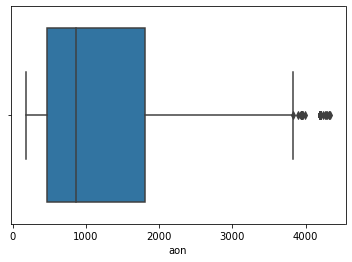

In [624]:
sns.boxplot(data =train_data,x='aon')
plt.show()

In [625]:
train_data.groupby('churn_probability').aon.median()

churn_probability
0    925.0
1    570.5
Name: aon, dtype: float64

In [626]:
train_data.churn_probability.dtype

dtype('int64')

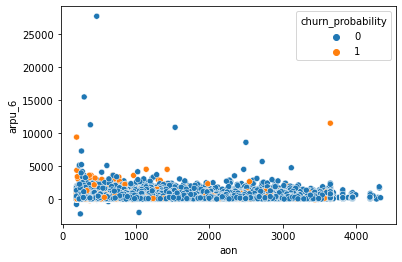

In [627]:
sns.scatterplot(data=train_data,x='aon',y='arpu_6',hue='churn_probability')
plt.show()

# Outlier Treatment 

All most all the continuous variables needs outlier treatment.


In [628]:
# Outlier treatment to the all variables except 'id','churn_probability'
out_var = train_data.columns.drop(['id','churn_probability'])

In [629]:
# Outlier treatment to the variable using IQR of Q1 = 0.015 and Q3 = .99
Q1 = train_data[out_var].quantile(0.01)
Q3 = train_data[out_var].quantile(0.99)
IQR = Q3 - Q1

treated_data = train_data[~((train_data[out_var] < (Q1 - 1.5 * IQR)) |(train_data[out_var] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [630]:
treated_data.shape

(63833, 126)

In [631]:
treated_data['churn_probability'].value_counts()

0    57300
1     6533
Name: churn_probability, dtype: int64

In [632]:
train_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

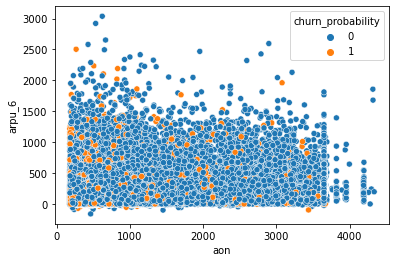

In [633]:
# Plot the scatter graph for age on network vs average revenue per user of June month
sns.scatterplot(data=treated_data,x='aon',y='arpu_6',hue='churn_probability')
plt.show()

In [741]:
treated_data.groupby('churn_probability').aon.mean()

churn_probability
0    1262.307469
1     830.519822
Name: aon, dtype: float64

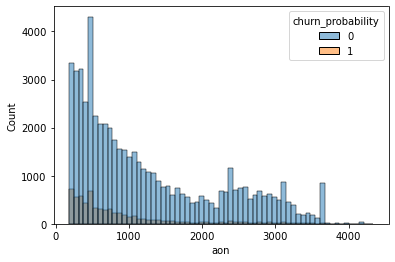

In [742]:
sns.histplot(data=treated_data,x='aon',hue='churn_probability')
plt.show()

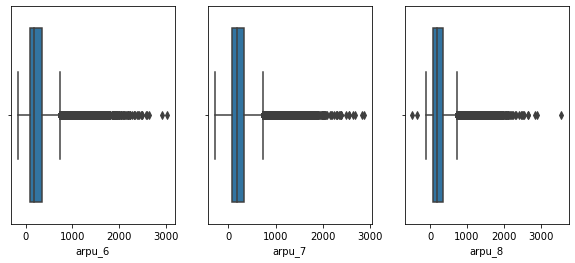

In [634]:
# box plot for arpu_6,arpu_7 and arpu_8 variable 
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
sns.boxplot(data=treated_data,x='arpu_6')
plt.subplot(1,3,2)
sns.boxplot(data =treated_data,x='arpu_7')
plt.subplot(1,3,3)
sns.boxplot(data =treated_data,x='arpu_8')
plt.show()

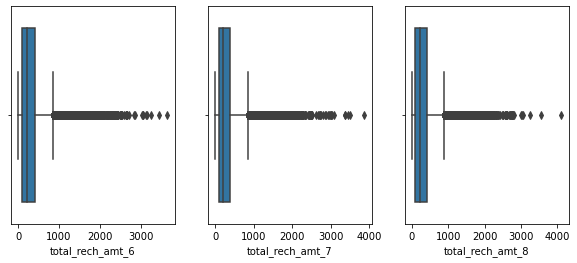

In [635]:
# box plot for total_rech_amt_6,total_rech_amt_7 and total_rech_amt_8 variable 
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
sns.boxplot(data=treated_data,x='total_rech_amt_6')
plt.subplot(1,3,2)
sns.boxplot(data =treated_data,x='total_rech_amt_7')
plt.subplot(1,3,3)
sns.boxplot(data =treated_data,x='total_rech_amt_8')
plt.show()

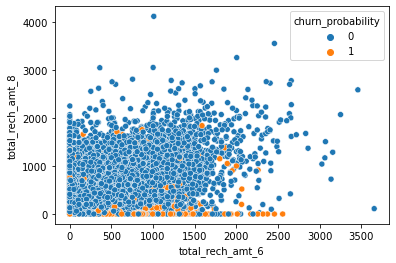

In [636]:
# Plot the graph to compare total recharge amount on June and August month for churn 
sns.scatterplot(data = treated_data,x='total_rech_amt_6',y='total_rech_amt_8',hue='churn_probability')
plt.show()

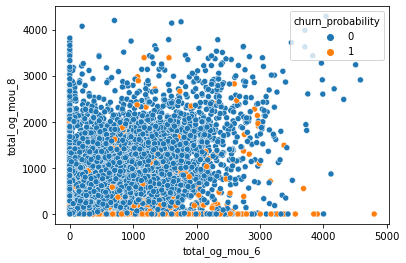

In [637]:
# Plot the graph to compare total outgoing calls on June and August month for churn 
sns.scatterplot(data = treated_data,x='total_og_mou_6',y='total_og_mou_8',hue='churn_probability')
plt.show()

**Observation**

Now the dataset is little free from outliers.


## Analyse the churn data

In [638]:
# Consider the churn data to analyse which features are affecting the customer to churn.
churn_data = treated_data[treated_data['churn_probability'] == 1]

In [639]:
churn_data.shape

(6533, 126)

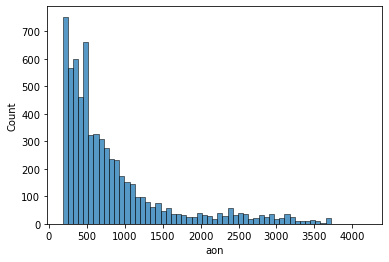

In [640]:
#Plot histogram of churn data for aon(Age on network) 
sns.histplot(data = churn_data,x='aon')
plt.show()

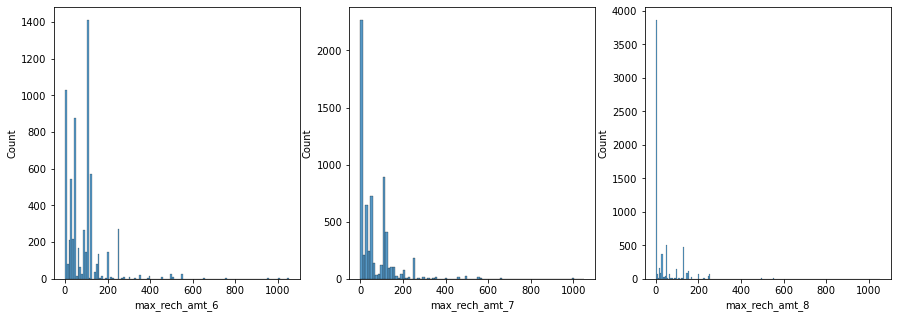

In [641]:
#Plot histogram of churn data for maximum recharge amount 'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='max_rech_amt_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='max_rech_amt_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='max_rech_amt_8')
plt.show()

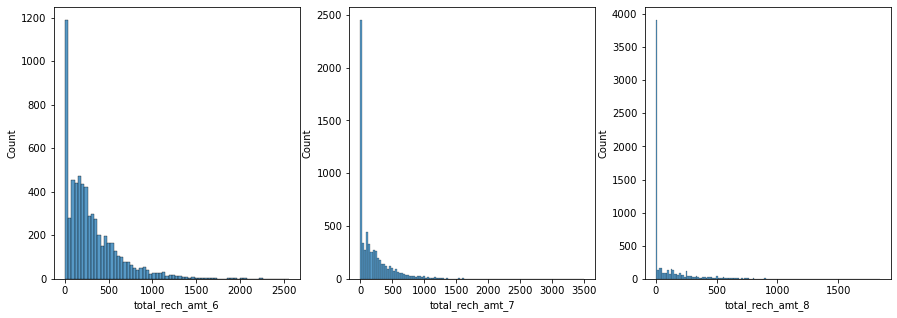

In [642]:
#Plot histogram of churn data for total recharge amount total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='total_rech_amt_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='total_rech_amt_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='total_rech_amt_8')
plt.show()

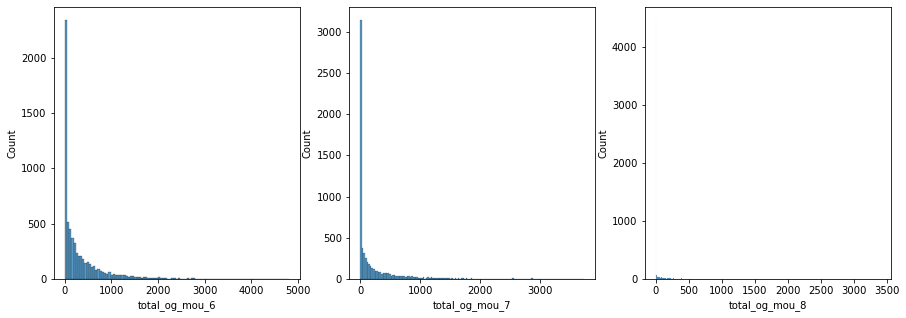

In [643]:
#Plot histogram of churn data for total outgoing minute of voice calls total_og_mou_6,total_og_mou_7,total_og_mou_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='total_og_mou_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='total_og_mou_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='total_og_mou_8')
plt.show()

In [644]:
churn_data[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,6533.000000,6533.000000,6533.000000
mean,325.162515,218.617098,83.109421
std,478.301398,410.931726,248.676281
min,0.000000,0.000000,0.000000
25%,1.690000,0.000000,0.000000
50%,134.560000,35.160000,0.000000
75%,441.880000,249.260000,30.760000
max,4805.230000,3732.560000,3391.510000


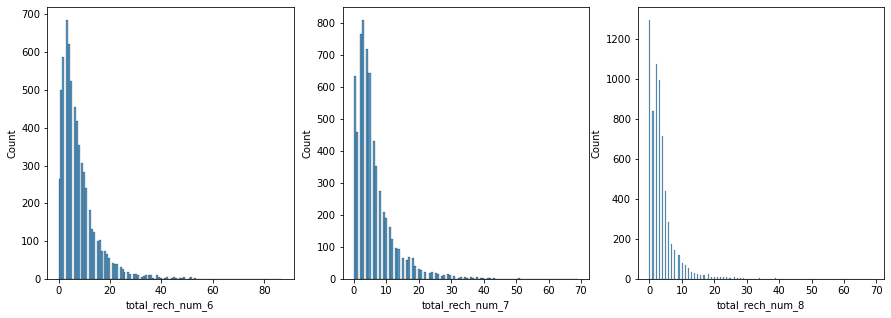

In [645]:
#Plot histogram of churn data for total outgoing minute of voice calls total_rech_num_6, total_rech_num_7, total_rech_num_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='total_rech_num_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='total_rech_num_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='total_rech_num_8')
plt.show()

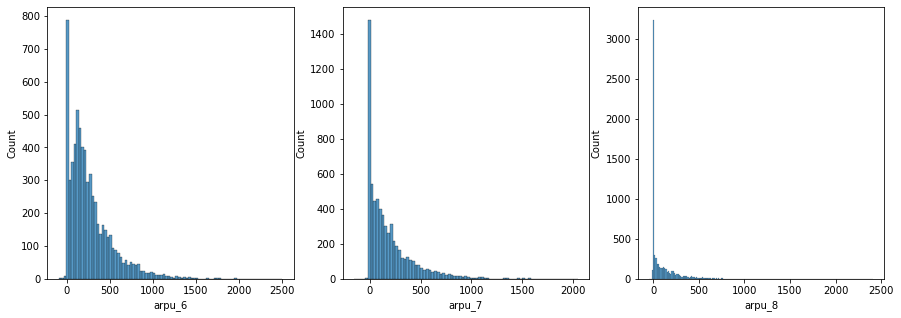

In [646]:
#Plot histogram of churn data for total outgoing minute of voice calls arpu_6, arpu_7, arpu_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='arpu_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='arpu_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='arpu_8')
plt.show()

**Observation**

From all the above graphs we can conclude that, the June month is good month, in July some customers are taking actions to churn, and in August again some more customers take actions to churn.

**Decision:**

We can take the average of June and July month and we can take the difference with August month data to analyse



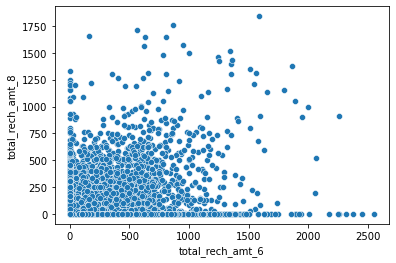

In [647]:
# Plot the graph to compare total recharge amount on June and August month for churn data
sns.scatterplot(data = churn_data,x='total_rech_amt_6',y='total_rech_amt_8')
plt.show()

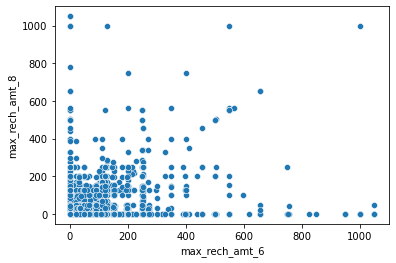

In [648]:
# Plot the graph to compare maximum recharge amount on June and August month for churn data
sns.scatterplot(data = churn_data,x='max_rech_amt_6',y='max_rech_amt_8')
plt.show()

In [649]:
churn_data.columns[:70]

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_

In [650]:
churn_data.columns[70:]

Index(['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_

## Get the high profitable custemer who churn

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators.

In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.


In [651]:
high_customer_data = churn_data[churn_data['total_rech_amt_6'] >= churn_data['total_rech_amt_6'].quantile(0.6)]

In [652]:
high_customer_data.shape

(2619, 126)

In [653]:
high_customer_data['total_rech_amt_6'].min()

286

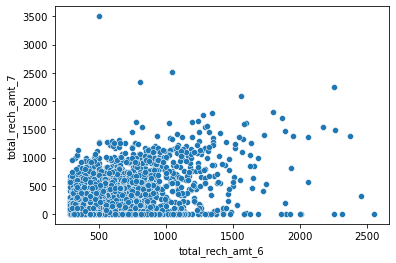

In [654]:
# Plot the graph to compare total recharge amount on June and July month for high_customer_data who churn
sns.scatterplot(data = high_customer_data,x='total_rech_amt_6',y='total_rech_amt_7')
plt.show()

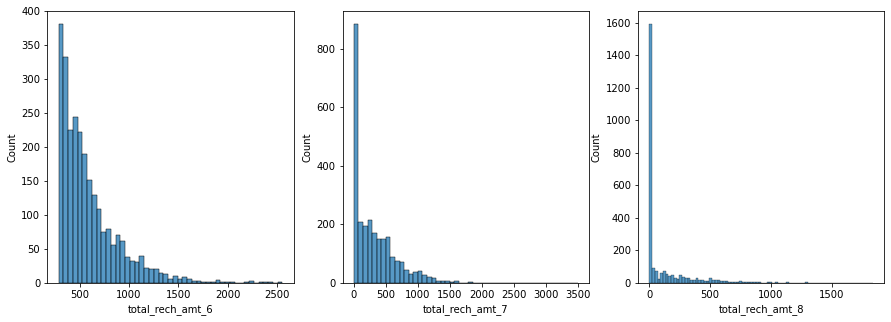

In [655]:
#Plot histogram of high_customer_data who churn for total recharge amount total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = high_customer_data,x='total_rech_amt_6')
plt.subplot(1,3,2)
sns.histplot(data = high_customer_data,x='total_rech_amt_7')
plt.subplot(1,3,3)
sns.histplot(data = high_customer_data,x='total_rech_amt_8')
plt.show()

**Observation**

The above graph shows that the high profitable churn customer they reduced their total recharge amount in July and August compare to June month

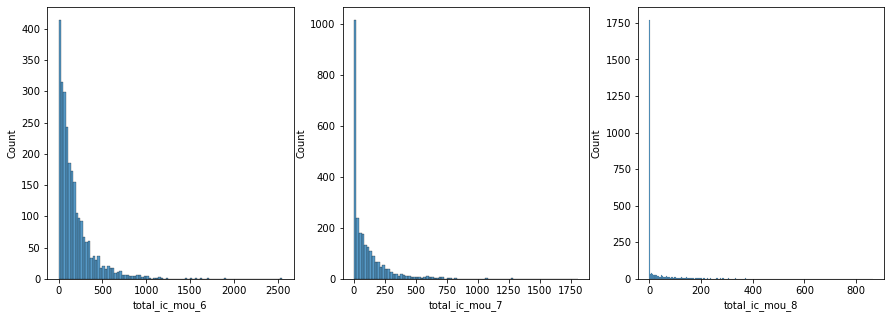

In [656]:
#Plot histogram of high_customer_data who churn for total incoming minutes of voice call 'total_ic_mou_6','total_ic_mou_7', 'total_ic_mou_8'
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = high_customer_data,x='total_ic_mou_6')
plt.subplot(1,3,2)
sns.histplot(data = high_customer_data,x='total_ic_mou_7')
plt.subplot(1,3,3)
sns.histplot(data = high_customer_data,x='total_ic_mou_8')
plt.show()


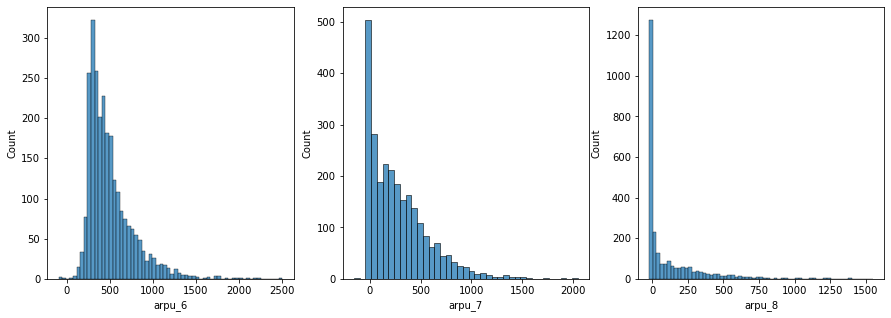

In [657]:
#Plot histogram of high_customer_data who churn for averge revenue per unit  'arpu_6', 'arpu_7', 'arpu_8'
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = high_customer_data,x='arpu_6')
plt.subplot(1,3,2)
sns.histplot(data = high_customer_data,x='arpu_7')
plt.subplot(1,3,3)
sns.histplot(data = high_customer_data,x='arpu_8')
plt.show()

**Observation**

The above graph shows that the average revenue per unit of high profitable churn customer reduced  in July and August compare to June month

In [658]:
# High profitable customer by considering average revenue per user
high_customer_data2 = churn_data[churn_data['arpu_6'] >= churn_data['arpu_6'].quantile(0.6)]
high_customer_data2.shape

(2613, 126)

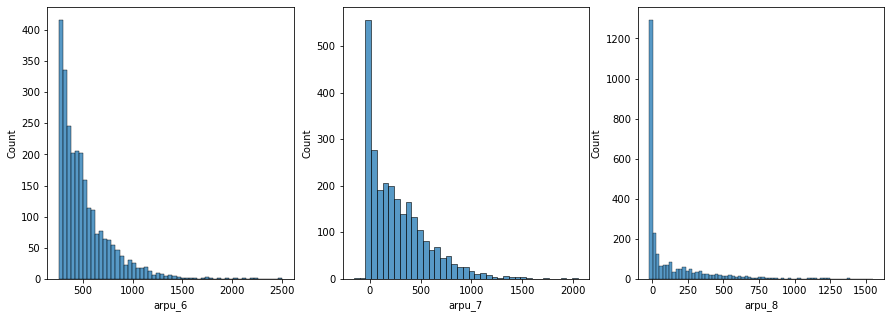

In [659]:
#Plot histogram of high_customer_data2 who churn for averge revenue per user 'arpu_6', 'arpu_7', 'arpu_8'
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = high_customer_data2,x='arpu_6')
plt.subplot(1,3,2)
sns.histplot(data = high_customer_data2,x='arpu_7')
plt.subplot(1,3,3)
sns.histplot(data = high_customer_data2,x='arpu_8')
plt.show()

In [660]:
# Take a copy of treated_data to the tel_data for our analysis
tel_data = pd.DataFrame.copy(treated_data) # Used this dataframe to change the Feature Engineering at the end

In [661]:
tel_data.shape

(63833, 126)

# Feature Engineering

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [663]:
# Create total minutes of usage voice calls for June , July and August month - total_mou_6, total_mou_7,total_mou_8
treated_data['total_mou_6'] =treated_data['onnet_mou_6']+treated_data['offnet_mou_6']
treated_data['total_mou_7']= treated_data['onnet_mou_7']+treated_data['offnet_mou_7']
treated_data['total_mou_8'] =treated_data['onnet_mou_8']+treated_data['offnet_mou_8']

In [94]:
treated_data[['total_mou_6','total_mou_7','total_mou_8']].describe()

,total_mou_6,total_mou_7,total_mou_8
count,63833.000000,63833.000000,63833.000000
mean,294.364787,291.588430,289.562378
std,392.990727,398.098612,397.454615
min,0.000000,0.000000,0.000000
25%,62.140000,56.720000,57.430000
50%,147.320000,138.450000,135.990000
75%,365.780000,361.920000,356.850000
max,4805.220000,4920.600000,4284.980000


In [95]:
# Drop 'onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8' because we already consider these columns
treated_data = treated_data.drop(['onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8'],axis = 1)

In [96]:
# Create total roam minutes of usage voice calls for June ,July and August month - total_roam_mou_6,total_roam_mou_7,total_roam_mou_8
treated_data['total_roam_mou_6'] = treated_data['roam_ic_mou_6'] + treated_data['roam_og_mou_6']
treated_data['total_roam_mou_7'] = treated_data['roam_ic_mou_7'] + treated_data['roam_og_mou_7']
treated_data['total_roam_mou_8'] = treated_data['roam_ic_mou_8'] + treated_data['roam_og_mou_8']

In [97]:
# Drop 'roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8' because we already consider these columns
treated_data = treated_data.drop(['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8'],axis = 1)

In [98]:
#Create total outgoing voice calls of local,std,isd,spl and others  for the month June , July and August

treated_data['total_outgoing_mou_6'] = treated_data['loc_og_t2t_mou_6'] + treated_data['loc_og_t2m_mou_6'] + treated_data['loc_og_t2f_mou_6'] + treated_data['loc_og_t2c_mou_6'] + treated_data['std_og_t2t_mou_6'] + treated_data['std_og_t2m_mou_6'] + treated_data['std_og_t2f_mou_6']+ treated_data['isd_og_mou_6'] + treated_data['spl_og_mou_6'] + treated_data['og_others_6']

treated_data['total_outgoing_mou_7'] = treated_data['loc_og_t2t_mou_7'] + treated_data['loc_og_t2m_mou_7'] + treated_data['loc_og_t2f_mou_7'] + treated_data['loc_og_t2c_mou_7'] + treated_data['std_og_t2t_mou_7'] + treated_data['std_og_t2m_mou_7'] + treated_data['std_og_t2f_mou_7']+ treated_data['isd_og_mou_7'] + treated_data['spl_og_mou_7'] + treated_data['og_others_7']

treated_data['total_outgoing_mou_8'] = treated_data['loc_og_t2t_mou_8'] + treated_data['loc_og_t2m_mou_8'] + treated_data['loc_og_t2f_mou_8'] + treated_data['loc_og_t2c_mou_8'] + treated_data['std_og_t2t_mou_8'] + treated_data['std_og_t2m_mou_8'] + treated_data['std_og_t2f_mou_8']+ treated_data['isd_og_mou_8'] + treated_data['spl_og_mou_8'] + treated_data['og_others_8']

#Create total incomming voice calls of local,std,isd,spl and others  for the month June , July and August

treated_data['total_incomming_mou_6'] = treated_data['loc_ic_t2t_mou_6'] + treated_data['loc_ic_t2m_mou_6'] + treated_data['loc_ic_t2f_mou_6'] + treated_data['std_ic_t2t_mou_6'] + treated_data['std_ic_t2m_mou_6'] + treated_data['std_ic_t2f_mou_6']+ treated_data['isd_ic_mou_6'] + treated_data['spl_ic_mou_6'] + treated_data['ic_others_6']

treated_data['total_incomming_mou_7'] = treated_data['loc_ic_t2t_mou_7'] + treated_data['loc_ic_t2m_mou_7'] + treated_data['loc_ic_t2f_mou_7'] + treated_data['std_ic_t2t_mou_7'] + treated_data['std_ic_t2m_mou_7'] + treated_data['std_ic_t2f_mou_7']+ treated_data['isd_ic_mou_7'] + treated_data['spl_ic_mou_7'] + treated_data['ic_others_7']

treated_data['total_incomming_mou_8'] = treated_data['loc_ic_t2t_mou_8'] + treated_data['loc_ic_t2m_mou_8'] + treated_data['loc_ic_t2f_mou_8'] + treated_data['std_ic_t2t_mou_8'] + treated_data['std_ic_t2m_mou_8'] + treated_data['std_ic_t2f_mou_8']+ treated_data['isd_ic_mou_8'] + treated_data['spl_ic_mou_8'] + treated_data['ic_others_8']


In [99]:

# Drop 'loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6'
# Drop 'loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7'
# Drop 'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8'
# because we already consider these columns

treated_data = treated_data.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6'],axis = 1)

treated_data = treated_data.drop(['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7'],axis = 1)

treated_data = treated_data.drop(['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8'],axis = 1)


# Drop 'std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'
# Drop 'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'
# Drop 'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'
# because we already consider these columns

treated_data = treated_data.drop(['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],axis = 1)

treated_data = treated_data.drop(['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],axis = 1)

treated_data = treated_data.drop(['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],axis = 1)


 # Drop 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6','spl_og_mou_7', 'spl_og_mou_8', 
# 'og_others_6', 'og_others_7','og_others_8'

treated_data = treated_data.drop(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6','spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7','og_others_8'],axis = 1)


 # Drop 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8', 
# 'ic_others_6', 'ic_others_7','ic_others_8'

treated_data = treated_data.drop(['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_6', 'ic_others_7','ic_others_8'],axis = 1)

In [100]:
treated_data.shape

(63833, 69)

In [101]:
treated_data.describe()

,id,arpu_6,arpu_7,arpu_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,...,total_mou_8,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_outgoing_mou_6,total_outgoing_mou_7,total_outgoing_mou_8,total_incomming_mou_6,total_incomming_mou_7,total_incomming_mou_8
count,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,...,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000
mean,34954.944057,255.816062,249.222166,250.462667,126.039507,122.801692,122.373626,153.033444,157.637528,155.535282,...,289.562378,17.076653,10.500360,10.164899,282.682317,284.577652,282.009282,174.807185,174.457173,174.530820
std,20204.780730,245.402496,243.064782,248.076484,186.731484,181.563724,179.888472,339.877690,348.738756,348.752101,...,397.454615,69.702137,48.590703,47.399972,391.861318,398.500702,398.555929,203.569535,201.634687,201.092287
min,0.000000,-160.795000,-282.788000,-491.545000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17446.000000,89.194000,82.398000,79.999000,18.060000,18.180000,18.540000,0.000000,0.000000,0.000000,...,57.430000,0.000000,0.000000,0.000000,56.140000,53.510000,54.650000,47.220000,48.980000,50.260000
50%,34961.000000,187.063000,180.212000,181.547000,65.190000,63.430000,63.520000,11.730000,11.260000,10.505000,...,135.990000,0.000000,0.000000,0.000000,138.920000,134.780000,132.270000,108.500000,109.250000,107.740000
75%,52450.000000,345.794000,339.866000,344.161000,152.680000,148.530000,148.210000,128.140000,131.090000,124.940000,...,356.850000,0.000000,0.000000,0.000000,353.030000,355.910000,351.250000,230.330000,228.730000,229.300000
max,69998.000000,3036.592000,2881.842000,3561.801000,2537.560000,2654.580000,2194.840000,3762.440000,4547.660000,4103.240000,...,4284.980000,1115.250000,873.510000,867.920000,4805.220000,4876.570000,4295.780000,2652.730000,2279.810000,2572.790000


In [102]:
treated_data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc

In [103]:
# Find the highly correlated variables
corr = treated_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.90) | (corr < -0.90)]
high_corr_value

total_ic_mou_6         loc_ic_mou_6      0.955446
total_ic_mou_7         loc_ic_mou_7      0.952744
total_ic_mou_8         loc_ic_mou_8      0.948953
total_rech_amt_6       arpu_6            0.949642
total_rech_amt_7       arpu_7            0.952433
total_rech_amt_8       arpu_8            0.952300
total_mou_6            total_og_mou_6    0.991726
total_mou_7            total_og_mou_7    0.995061
total_mou_8            total_og_mou_8    0.994815
total_outgoing_mou_6   total_og_mou_6    0.999569
                       total_mou_6       0.992982
total_outgoing_mou_7   total_og_mou_7    0.999602
                       total_mou_7       0.996172
total_outgoing_mou_8   total_og_mou_8    0.999483
                       total_mou_8       0.996313
total_incomming_mou_6  loc_ic_mou_6      0.960507
                       total_ic_mou_6    0.997408
total_incomming_mou_7  loc_ic_mou_7      0.957853
                       total_ic_mou_7    0.997369
total_incomming_mou_8  loc_ic_mou_8      0.955937


In [104]:
type(corr)

pandas.core.series.Series

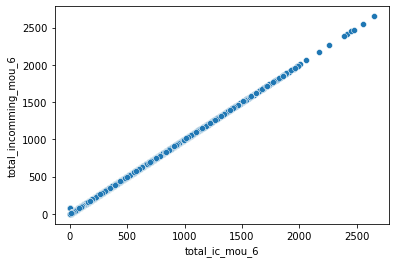

In [105]:
sns.scatterplot(data= treated_data, x='total_ic_mou_6', y='total_incomming_mou_6')
plt.show()

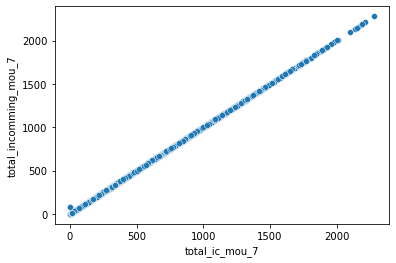

In [106]:
sns.scatterplot(data= treated_data, x='total_ic_mou_7', y='total_incomming_mou_7')
plt.show()

**Observation**

1. Looks like we created variables which already present in the dataset.

**Decision**

1. Drop the duplicate columns. 'total_outgoing_mou_6', 'total_outgoing_mou_7','total_outgoing_mou_8', 'total_incomming_mou_6',
       'total_incomming_mou_7', 'total_incomming_mou_8' 

In [107]:
#Drop the above columns
treated_data = treated_data.drop(['total_outgoing_mou_6', 'total_outgoing_mou_7','total_outgoing_mou_8', 'total_incomming_mou_6','total_incomming_mou_7', 'total_incomming_mou_8'],axis=1)

In [108]:
# Filter the columns of June ,July and August seperately
col_list6 = [s for s in treated_data.columns if '6' in s] 
col_list7 = [s for s in treated_data.columns if '7' in s]
col_list8 = [s for s in treated_data.columns if '8' in s]

In [109]:
ic_col_list6 = [s for s in col_list6 if 'ic' in s]

In [110]:
ic_col_list6

['loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6']

In [111]:
ic_col_list7 = [s for s in col_list7 if 'ic' in s]
ic_col_list8 =[s for s in col_list8 if 'ic' in s]

In [112]:
treated_data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc

In [113]:
June_col = [s for s in treated_data.columns if s.endswith('_6')]
July_col = [s for s in treated_data.columns if s.endswith('_7')]
August_col = [s for s in treated_data.columns if s.endswith('_8')]

In [114]:
June_col

['arpu_6',
 'loc_og_mou_6',
 'std_og_mou_6',
 'total_og_mou_6',
 'loc_ic_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'total_mou_6',
 'total_roam_mou_6']

In [115]:
for i,j in zip(June_col,July_col):
    name = i+'7'
    print(name," = ",i +" "+ j)

arpu_67  =  arpu_6 arpu_7
loc_og_mou_67  =  loc_og_mou_6 loc_og_mou_7
std_og_mou_67  =  std_og_mou_6 std_og_mou_7
total_og_mou_67  =  total_og_mou_6 total_og_mou_7
loc_ic_mou_67  =  loc_ic_mou_6 loc_ic_mou_7
std_ic_mou_67  =  std_ic_mou_6 std_ic_mou_7
total_ic_mou_67  =  total_ic_mou_6 total_ic_mou_7
total_rech_num_67  =  total_rech_num_6 total_rech_num_7
total_rech_amt_67  =  total_rech_amt_6 total_rech_amt_7
max_rech_amt_67  =  max_rech_amt_6 max_rech_amt_7
last_day_rch_amt_67  =  last_day_rch_amt_6 last_day_rch_amt_7
vol_2g_mb_67  =  vol_2g_mb_6 vol_2g_mb_7
vol_3g_mb_67  =  vol_3g_mb_6 vol_3g_mb_7
monthly_2g_67  =  monthly_2g_6 monthly_2g_7
sachet_2g_67  =  sachet_2g_6 sachet_2g_7
monthly_3g_67  =  monthly_3g_6 monthly_3g_7
sachet_3g_67  =  sachet_3g_6 sachet_3g_7
total_mou_67  =  total_mou_6 total_mou_7
total_roam_mou_67  =  total_roam_mou_6 total_roam_mou_7


In [116]:
# Create variable for Average of June and July months data

for i,j in zip(June_col,July_col):
    name = "avg_"+i+'7'
    treated_data[name] = (treated_data[i] + treated_data[j])/2

In [117]:
treated_data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc

In [118]:
# Drop the columns which already considered columns 

treated_data = treated_data.drop(June_col, axis =1)
treated_data = treated_data.drop(July_col, axis =1)

In [119]:
treated_data.columns

Index(['id', 'arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_mou_8', 'total_roam_mou_8',
       'avg_arpu_67', 'avg_loc_og_mou_67', 'avg_std_og_mou_67',
       'avg_total_og_mou_67', 'avg_loc_ic_mou_67', 'avg_std_ic_mou_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67', 'avg_total_rech_amt_67',
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67',
       'avg_vol_3g_mb_67', 'avg_monthly_2g_67', 'avg_sachet_2g_67',
       'avg_monthly_3g_67', 'avg_sachet_3g_67', 'avg_total_mou_67',
       'avg_total_roam_mou_67'],
      dtype='object')

In [120]:
###########################&&&&&&&&&&&&&&&&&&&&&&&########################

In [121]:
"diff_"+ "arpu_67".split('_67')[0] 

'diff_arpu'

In [122]:
# Consider variables the Average of June July data and August month data
month_67 = [s for s in treated_data.columns if (s.endswith('_67'))]
month_8 = [s for s in treated_data.columns if (s.endswith('_8')) ]

In [123]:
month_67

['avg_arpu_67',
 'avg_loc_og_mou_67',
 'avg_std_og_mou_67',
 'avg_total_og_mou_67',
 'avg_loc_ic_mou_67',
 'avg_std_ic_mou_67',
 'avg_total_ic_mou_67',
 'avg_total_rech_num_67',
 'avg_total_rech_amt_67',
 'avg_max_rech_amt_67',
 'avg_last_day_rch_amt_67',
 'avg_vol_2g_mb_67',
 'avg_vol_3g_mb_67',
 'avg_monthly_2g_67',
 'avg_sachet_2g_67',
 'avg_monthly_3g_67',
 'avg_sachet_3g_67',
 'avg_total_mou_67',
 'avg_total_roam_mou_67']

In [124]:
month_8

['arpu_8',
 'loc_og_mou_8',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'total_mou_8',
 'total_roam_mou_8']

In [125]:
# Derive variables to find the difference between the (Average of June , July) and August

for i , j in zip(month_67,month_8):
    name = "diff_"+j.split('_8')[0]
    treated_data[name] = treated_data[i] - treated_data[j]

In [126]:

treated_data.columns

Index(['id', 'arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_mou_8', 'total_roam_mou_8',
       'avg_arpu_67', 'avg_loc_og_mou_67', 'avg_std_og_mou_67',
       'avg_total_og_mou_67', 'avg_loc_ic_mou_67', 'avg_std_ic_mou_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67', 'avg_total_rech_amt_67',
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67',
       'avg_vol_3g_mb_67', 'avg_monthly_2g_67', 'avg_sachet_2g_67',
       'avg_monthly_3g_67', 'avg_sachet_3g_67', 'avg_total_mou_67',
       'avg_total_roam_mou_67', 'diff_arpu', 'diff_loc_og_mou',
       'diff_std_og_mou', 'diff_total_og_mou', 'diff_loc_ic_mou',
      

In [127]:
treated_data.shape

(63833, 63)

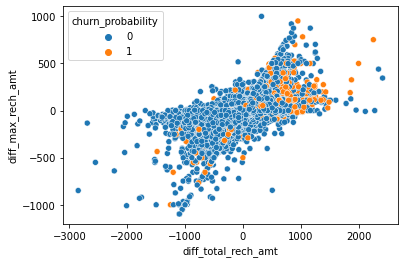

In [128]:
# Plot the graph to compare'diff_total_rech_amt' 'diff_max_rech_amt'
sns.scatterplot(data = treated_data,x='diff_total_rech_amt',y='diff_max_rech_amt',hue='churn_probability')
plt.show()

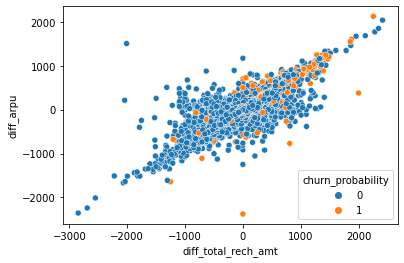

In [129]:
# Plot the graph to compare'diff_total_rech_amt' 'diff_arpu'
sns.scatterplot(data = treated_data,x='diff_total_rech_amt',y='diff_arpu',hue='churn_probability')
plt.show()

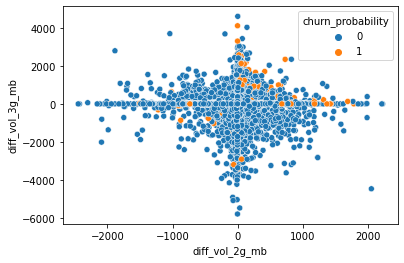

In [130]:
# Plot the graph to compare 'diff_vol_2g_mb' & 'diff_vol_3g_mb'
sns.scatterplot(data = treated_data,x='diff_vol_2g_mb',y='diff_vol_3g_mb',hue='churn_probability')
plt.show()

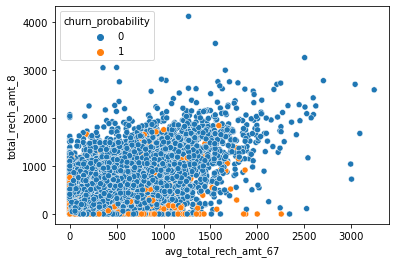

In [131]:
# Plot the graph to compare avg_total_rech_amt_67 ,'total_rech_amt_8'
sns.scatterplot(data = treated_data,x='avg_total_rech_amt_67',y='total_rech_amt_8',hue='churn_probability')
plt.show()

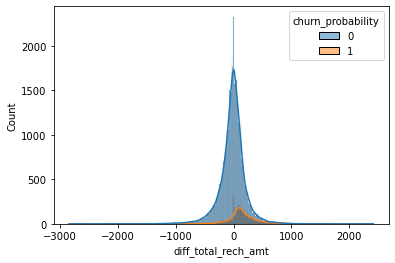

In [132]:
#Check the distribution of 'diff_total_rech_amt'
sns.histplot(data = treated_data,x='diff_total_rech_amt',hue='churn_probability',kde= True)
plt.show()

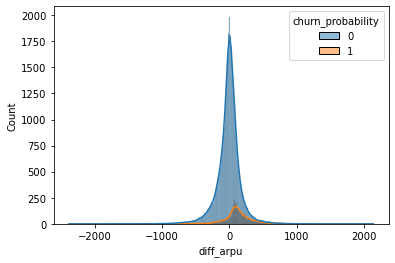

In [133]:
#Check the distribution of 'diff_arpu'
sns.histplot(data = treated_data,x='diff_arpu',hue='churn_probability',kde= True)
plt.show()

# Data Preparation

In [134]:
treated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63833 entries, 0 to 69998
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       63833 non-null  int64  
 1   arpu_8                   63833 non-null  float64
 2   loc_og_mou_8             63833 non-null  float64
 3   std_og_mou_8             63833 non-null  float64
 4   total_og_mou_8           63833 non-null  float64
 5   loc_ic_mou_8             63833 non-null  float64
 6   std_ic_mou_8             63833 non-null  float64
 7   total_ic_mou_8           63833 non-null  float64
 8   total_rech_num_8         63833 non-null  int64  
 9   total_rech_amt_8         63833 non-null  int64  
 10  max_rech_amt_8           63833 non-null  int64  
 11  last_day_rch_amt_8       63833 non-null  int64  
 12  vol_2g_mb_8              63833 non-null  float64
 13  vol_3g_mb_8              63833 non-null  float64
 14  monthly_2g_8          

In [135]:
treated_data.iloc[:,:20].describe()

,id,arpu_8,loc_og_mou_8,std_og_mou_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g
count,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.00000
mean,34954.944057,250.462667,122.373626,155.535282,277.913576,147.675758,23.770025,170.360174,6.967681,291.495950,100.186424,58.280529,43.947935,108.217901,0.076230,0.422509,0.070418,0.054141,1218.116084,57.51566
std,20204.780730,248.076484,179.888472,348.752101,399.950669,184.120945,52.829701,203.864813,6.689502,298.983396,101.002091,84.872169,170.988680,384.753719,0.284293,1.496282,0.325679,0.321575,950.104479,214.00413
min,0.000000,-491.545000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.00000
25%,17446.000000,79.999000,18.540000,0.000000,36.680000,34.360000,0.100000,36.380000,3.000000,90.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.00000
50%,34961.000000,181.547000,63.520000,10.505000,131.240000,93.890000,5.830000,107.760000,5.000000,210.000000,75.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.00000
75%,52450.000000,344.161000,148.210000,124.940000,349.530000,188.080000,22.940000,229.310000,9.000000,406.000000,144.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1805.000000,0.00000
max,69998.000000,3561.801000,2194.840000,4103.240000,4286.830000,2524.660000,848.280000,2572.830000,86.000000,4115.000000,1098.000000,1098.000000,2450.570000,5809.480000,2.000000,20.000000,5.000000,5.000000,4337.000000,3050.34000


In [136]:
treated_data.iloc[:,20:40].describe()

,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_8,total_roam_mou_8,avg_arpu_67,avg_loc_og_mou_67,avg_std_og_mou_67,avg_total_og_mou_67,avg_loc_ic_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67
count,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000
mean,55.385779,49.982882,0.102345,289.562378,10.164899,252.519114,124.420599,155.335486,280.425728,147.744988,23.719951,171.602041,7.338782,291.676883,96.571867,56.828200,45.718608,99.152405,0.076481,0.392321
std,214.406822,198.317382,0.303104,397.454615,47.399972,224.077220,175.462286,319.363077,366.481912,176.871258,47.126299,193.383647,5.922475,265.755734,81.666506,62.646944,157.736523,330.549228,0.249753,1.341582
min,0.000000,0.000000,0.000000,0.000000,0.000000,-33.206500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,57.430000,0.000000,98.263500,25.200000,0.605000,57.670000,40.160000,1.105000,44.950000,3.500000,110.000000,40.000000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,135.990000,0.000000,187.591500,64.310000,14.605000,149.660000,92.470000,6.670000,112.760000,5.500000,216.500000,80.000000,37.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,356.850000,0.000000,334.256000,150.745000,154.585000,356.665000,189.435000,24.595000,227.325000,9.000000,388.000000,120.000000,80.000000,1.200000,0.000000,0.000000,0.000000
max,3114.580000,2957.210000,1.000000,4284.980000,867.920000,2734.049500,2253.710000,4080.680000,4517.460000,2125.565000,696.235000,2180.485000,75.000000,3248.000000,1050.000000,951.000000,2286.145000,4904.865000,2.000000,19.000000


In [137]:
treated_data.iloc[:,40:60].describe()

,avg_monthly_3g_67,avg_sachet_3g_67,avg_total_mou_67,avg_total_roam_mou_67,diff_arpu,diff_loc_og_mou,diff_std_og_mou,diff_total_og_mou,diff_loc_ic_mou,diff_std_ic_mou,diff_total_ic_mou,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_vol_2g_mb,diff_vol_3g_mb,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g
count,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000
mean,0.064778,0.051987,292.976608,13.788506,2.056447,2.046973,-0.199796,2.512152,0.069230,-0.050074,1.241867,0.371101,0.180933,-3.614557,-1.452329,1.770673,-9.065496,0.000251,-0.030188,-0.005640
std,0.274368,0.260442,367.326476,49.417164,188.728631,107.926572,254.727166,297.933153,111.117822,39.735658,127.400572,5.224774,237.332154,86.838964,84.311004,149.571701,293.761523,0.247749,1.130826,0.268476
min,0.000000,0.000000,0.000000,0.000000,-2381.350000,-1688.315000,-3691.630000,-3815.180000,-1549.660000,-674.330000,-1879.720000,-67.000000,-2847.500000,-1098.000000,-1098.000000,-2450.570000,-5789.590000,-2.000000,-19.000000,-4.500000
25%,0.000000,0.000000,70.870000,0.000000,-73.217500,-26.320000,-9.210000,-55.960000,-33.245000,-4.345000,-37.945000,-1.500000,-100.000000,-30.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,158.555000,0.000000,5.806500,0.790000,0.000000,2.470000,0.450000,0.115000,1.300000,0.500000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,369.000000,1.215000,82.414500,30.065000,14.385000,68.225000,34.805000,6.480000,42.430000,2.500000,107.000000,25.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,5.000000,4536.205000,941.615000,2132.446000,1577.750000,3060.735000,4067.155000,1668.960000,607.850000,1685.165000,63.500000,2415.000000,1000.000000,951.000000,2230.355000,4603.335000,2.000000,18.000000,4.500000


In [138]:
treated_data.iloc[:,60:].describe()

,diff_sachet_3g,diff_total_mou,diff_total_roam_mou
count,63833.000000,63833.000000,63833.000000
mean,-0.002154,3.414230,3.623607
std,0.308599,290.179604,53.682336
min,-5.000000,-3806.105000,-737.350000
25%,0.000000,-57.275000,0.000000
50%,0.000000,3.477500,0.000000
75%,0.000000,68.015000,0.000000
max,4.500000,3986.040000,759.180000


In [139]:
treated_data.columns

Index(['id', 'arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_mou_8', 'total_roam_mou_8',
       'avg_arpu_67', 'avg_loc_og_mou_67', 'avg_std_og_mou_67',
       'avg_total_og_mou_67', 'avg_loc_ic_mou_67', 'avg_std_ic_mou_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67', 'avg_total_rech_amt_67',
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67',
       'avg_vol_3g_mb_67', 'avg_monthly_2g_67', 'avg_sachet_2g_67',
       'avg_monthly_3g_67', 'avg_sachet_3g_67', 'avg_total_mou_67',
       'avg_total_roam_mou_67', 'diff_arpu', 'diff_loc_og_mou',
       'diff_std_og_mou', 'diff_total_og_mou', 'diff_loc_ic_mou',
      

In [140]:
# Putting feature variable to X
X = treated_data.drop(['churn_probability','id'],axis=1)

# Putting response variable to y
y = treated_data['churn_probability']


In [141]:
feature_var = X.columns

## Feature Standardization

In [142]:
# Scaling all continuous independent variables by Standardization

# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler 
scaler = StandardScaler()

# Apply scaler to all the continuous independent variables
X = scaler.fit_transform(X)

In [143]:
X = pd.DataFrame(X,columns=feature_var)

In [144]:
X.head()

,arpu_8,loc_og_mou_8,std_og_mou_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,...,diff_max_rech_amt,diff_last_day_rch_amt,diff_vol_2g_mb,diff_vol_3g_mb,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_total_mou,diff_total_roam_mou
0,-0.979285,-0.665771,-0.443084,-0.685799,-0.667858,-0.162600,-0.636702,-0.742614,-0.941518,-0.892923,...,0.674985,0.788187,-0.011838,0.030860,-0.001012,0.026696,0.021007,0.006980,0.495924,-0.067501
1,-0.836481,-0.680280,-0.445980,-0.615715,-0.666120,-0.449940,-0.712832,-0.294147,-0.807730,-0.496889,...,0.300726,0.017226,1.167906,0.037601,-0.001012,0.026696,1.883385,0.006980,-0.073435,-0.067501
2,-1.009627,-0.680280,-0.445980,-0.694875,-0.639073,-0.329174,-0.655931,-0.742614,-0.974965,-0.991932,...,0.847720,0.728882,-0.011838,0.030860,-0.001012,0.026696,0.021007,0.006980,0.251004,-0.067501
3,-0.561798,-0.548920,-0.432790,-0.560257,-0.361970,-0.396750,-0.424403,-0.593125,-0.540154,-0.496889,...,0.732563,0.728882,-0.011838,0.030860,-0.001012,0.026696,0.021007,0.006980,0.108936,-0.097865
4,-0.600213,-0.592670,-0.445980,-0.655470,-0.648306,-0.449940,-0.696792,0.154320,-0.566912,-0.694906,...,0.220117,-0.131036,0.899939,0.030860,-0.001012,0.468854,0.021007,1.627216,0.142777,0.578619


# Handling Class Imbalance

In [365]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resample, y_resample = sm.fit_resample(X, y)

In [366]:
X_resample.shape

(114600, 61)

In [367]:
y_resample.value_counts()

1    57300
0    57300
Name: churn_probability, dtype: int64

# Splitting the data into train and test data 

In [368]:
#Import library for splitting the data into train and test data

from sklearn.model_selection import train_test_split

In [369]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, train_size=0.7,test_size=0.3,random_state=100)

In [370]:
type(X_train)

pandas.core.frame.DataFrame

In [371]:
# Reshaping the y_train and y_test data 
y_train = y_train.values.reshape(-1,1)
y_test =y_test.values.reshape(-1,1)

# Model Building

In [372]:
#Import library for Logistic Regression modelling
import statsmodels.api as sm

In [373]:
# Create First Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80177
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29348.
Date:                Mon, 07 Nov 2022   Deviance:                       58695.
Time:                        17:25:31   Pearson chi2:                 1.89e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5350      0.020    -76.162      0.000      -1.574      -1.495
arpu_8                      0.3992      0.042      9.423      0.000       0.316       0.482
loc_og_mou_8                2.2924      0.155     14.760      0.000       1.988       2.597
std_og_mou_8                4.7923      0.295     16.223      0.000       4.213       5.371
total_og_mou_8             -9.3764      0.258    -36.278      0.000      -9.883      -8.870
loc_ic_mou_8               -0.2203      0.085     -2.585      0.010      -0.387      -0.053
std_ic_mou_8                0.0857      0.026      3.294      0.001       0.035       0.137
total_ic_mou_8             -0.6044      0.092     -6.601      0.000      -0.784      -0.425
total_rech_num_8           -0.2116      0.014    -15.305      0.000      -0.239      -0.185
total_rech_amt_8           -0.2029      0.046     -4.435      0.000      -0.293      -0.113
max_rech_amt_8             -0.0714      0.014     -5.102      0.000      -0.099      -0.044
last_day_rch_amt_8         -0.2974      0.012    -24.626      0.000      -0.321      -0.274
vol_2g_mb_8                 0.0796      0.019      4.167      0.000       0.042       0.117
vol_3g_mb_8                -0.0452      0.019     -2.405      0.016      -0.082      -0.008
monthly_2g_8               -0.1735      0.013    -13.244      0.000      -0.199      -0.148
sachet_2g_8                -0.1349      0.017     -8.055      0.000      -0.168      -0.102
monthly_3g_8               -0.1247      0.015     -8.184      0.000      -0.155      -0.095
sachet_3g_8                -0.0547      0.012     -4.651      0.000      -0.078      -0.032
aon                        -0.4122      0.013    -31.551      0.000      -0.438      -0.387
aug_vbc_3g                 -0.1273      0.029     -4.460      0.000      -0.183      -0.071
jul_vbc_3g                  0.0861      0.022      3.871      0.000       0.042       0.130
jun_vbc_3g                  0.0139      0.020      0.686      0.492      -0.026       0.054
total_mou_8                 3.7616      0.196     19.238      0.000       3.378       4.145
total_roam_mou_8           -0.0658      0.017     -3.944      0.000      -0.099      -0.033
avg_arpu_67                 0.3498      0.049      7.111      0.000       0.253       0.446
avg_loc_og_mou_67           2.1112      0.156     13.506      0.000       1.805       2.418
avg_std_og_mou_67           4.2483      0.303     14.031      0.000       3.655       4.842
avg_total_og_mou_67        -8.1400      0.249    -32.733      0.000      -8.627      -7.653
avg_loc_ic_mou_67          -0.1200      0.080     -1.506      0.132      -0.276       0.036
avg_std_ic_mou_67           0.0680      0.024      2.806      0.005       0.021       0.116
avg_total_ic_mou_67        -0.3960      0.086  

# Feature selection using RFE

In [374]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select = 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [375]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False])

In [376]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 21),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', False, 20),
 ('vol_3g_mb_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_8', False, 14),
 ('aon', True, 1),
 ('aug_vbc_3g', False, 10),
 ('jul_vbc_3g', False, 15),
 ('jun_vbc_3g', False, 27),
 ('total_mou_8', True, 1),
 ('total_roam_mou_8', True, 1),
 ('avg_arpu_67', True, 1),
 ('avg_loc_og_mou_67', True, 1),
 ('avg_std_og_mou_67', True, 1),
 ('avg_total_og_mou_67', True, 1),
 ('avg_loc_ic_mou_67', False, 11),
 ('avg_std_ic_mou_67', False, 13),
 ('avg_total_ic_mou_67', True, 1),
 ('avg_total_rech_num_67', False, 3),
 ('avg_total_rech_amt_67', True, 1),
 ('avg_max_rech_amt_67', True, 1),
 ('

In [378]:
col = X_train.columns[rfe.support_]

In [379]:
X_train.columns[~rfe.support_]

Index(['max_rech_amt_8', 'vol_2g_mb_8', 'sachet_3g_8', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'avg_loc_ic_mou_67', 'avg_std_ic_mou_67',
       'avg_total_rech_num_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avg_total_roam_mou_67', 'diff_arpu',
       'diff_loc_og_mou', 'diff_std_og_mou', 'diff_loc_ic_mou',
       'diff_std_ic_mou', 'diff_total_rech_num', 'diff_total_rech_amt',
       'diff_max_rech_amt', 'diff_vol_2g_mb', 'diff_vol_3g_mb',
       'diff_monthly_2g', 'diff_sachet_2g', 'diff_monthly_3g',
       'diff_sachet_3g', 'diff_total_roam_mou'],
      dtype='object')

## Assessing the model with StatsModels

In [380]:
# Building 2nd Logistic Regression Model 
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe_Model1 = logm2.fit()
rfe_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80193
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29215.
Date:                Mon, 07 Nov 2022   Deviance:                       58430.
Time:                        17:27:05   Pearson chi2:                 3.48e+06
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7269      0.020    -87.329      0.000      -1.766      -1.688
arpu_8                      0.6223      0.059     10.487      0.000       0.506       0.739
loc_og_mou_8                2.7978      0.259     10.821      0.000       2.291       3.305
std_og_mou_8                6.6185      0.499     13.257      0.000       5.640       7.597
total_og_mou_8            -10.0540      0.259    -38.814      0.000     -10.562      -9.546
loc_ic_mou_8               -0.3420      0.149     -2.294      0.022      -0.634      -0.050
std_ic_mou_8                0.1478      0.045      3.252      0.001       0.059       0.237
total_ic_mou_8             -0.6471      0.090     -7.177      0.000      -0.824      -0.470
total_rech_num_8           -0.3962      0.022    -18.422      0.000      -0.438      -0.354
total_rech_amt_8           -0.4448      0.057     -7.816      0.000      -0.556      -0.333
last_day_rch_amt_8         -0.3279      0.013    -25.851      0.000      -0.353      -0.303
vol_3g_mb_8                -0.1995      0.027     -7.269      0.000      -0.253      -0.146
monthly_2g_8               -0.2875      0.019    -14.946      0.000      -0.325      -0.250
sachet_2g_8                -0.3863      0.021    -18.406      0.000      -0.427      -0.345
monthly_3g_8               -0.1946      0.024     -8.108      0.000      -0.242      -0.148
aon                        -0.4326      0.014    -31.913      0.000      -0.459      -0.406
total_mou_8                 3.8177      0.191     20.023      0.000       3.444       4.191
total_roam_mou_8           -0.0917      0.023     -3.934      0.000      -0.137      -0.046
avg_arpu_67                 0.4388      0.073      6.033      0.000       0.296       0.581
avg_loc_og_mou_67           2.1539      0.163     13.231      0.000       1.835       2.473
avg_std_og_mou_67           3.8758      0.301     12.859      0.000       3.285       4.467
avg_total_og_mou_67        -8.9276      0.225    -39.747      0.000      -9.368      -8.487
avg_total_ic_mou_67        -0.3795      0.067     -5.670      0.000      -0.511      -0.248
avg_total_rech_amt_67      -0.0702      0.074     -0.946      0.344      -0.215       0.075
avg_max_rech_amt_67        -0.2437      0.022    -11.199      0.000      -0.286      -0.201
avg_last_day_rch_amt_67    -0.2017      0.015    -13.342      0.000      -0.231      -0.172
avg_total_mou_67            3.1887      0.149     21.341      0.000       2.896       3.482
diff_total_og_mou           2.5150      0.178     14.126      0.000       2.166       2.864
diff_total_ic_mou           0.4595      0.045     10.169      0.000       0.371       0.548
diff_last_day_rch_amt       0.1802      0.010     18.290      0.000       0.161       0.199
diff_total_mou             -1.1927      0.108  

In [381]:
type(col)

pandas.core.indexes.base.Index

In [382]:
col

Index(['arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aon', 'total_mou_8', 'total_roam_mou_8',
       'avg_arpu_67', 'avg_loc_og_mou_67', 'avg_std_og_mou_67',
       'avg_total_og_mou_67', 'avg_total_ic_mou_67', 'avg_total_rech_amt_67',
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_total_mou_67',
       'diff_total_og_mou', 'diff_total_ic_mou', 'diff_last_day_rch_amt',
       'diff_total_mou'],
      dtype='object')

In [383]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [384]:
# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_mou_8,inf
9,last_day_rch_amt_8,inf
28,diff_last_day_rch_amt,inf
27,diff_total_ic_mou,inf
26,diff_total_og_mou,inf
25,avg_total_mou_67,inf
24,avg_last_day_rch_amt_67,inf
21,avg_total_ic_mou_67,inf
20,avg_total_og_mou_67,inf
29,diff_total_mou,inf


In [385]:
col = col.drop('avg_total_rech_amt_67')

In [386]:
# Building Logistic Regression Model by removing 'avg_total_rech_amt_67'
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe_Model1 = logm2.fit()
rfe_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80194
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Nov 2022   Deviance:                          nan
Time:                        17:29:56   Pearson chi2:                 9.34e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.062e+14   3.62e+05  -8.46e+08      0.000   -3.06e+14   -3.06e+14
arpu_8                   2.587e+14   1.03e+06    2.5e+08      0.000    2.59e+14    2.59e+14
loc_og_mou_8             4.591e+14   4.88e+06   9.41e+07      0.000    4.59e+14    4.59e+14
std_og_mou_8             1.621e+15   9.48e+06   1.71e+08      0.000    1.62e+15    1.62e+15
total_og_mou_8           2.072e+26   4.95e+18   4.19e+07      0.000    2.07e+26    2.07e+26
loc_ic_mou_8            -9.184e+14   2.44e+06  -3.76e+08      0.000   -9.18e+14   -9.18e+14
std_ic_mou_8            -1.262e+14   7.77e+05  -1.62e+08      0.000   -1.26e+14   -1.26e+14
total_ic_mou_8           4.343e+26   1.04e+19   4.19e+07      0.000    4.34e+26    4.34e+26
total_rech_num_8         -3.65e+14   4.36e+05  -8.36e+08      0.000   -3.65e+14   -3.65e+14
total_rech_amt_8        -2.017e+14   1.06e+06   -1.9e+08      0.000   -2.02e+14   -2.02e+14
last_day_rch_amt_8      -1.952e+27   4.66e+19  -4.19e+07      0.000   -1.95e+27   -1.95e+27
vol_3g_mb_8             -1.022e+14   4.44e+05   -2.3e+08      0.000   -1.02e+14   -1.02e+14
monthly_2g_8            -1.911e+14   3.44e+05  -5.56e+08      0.000   -1.91e+14   -1.91e+14
sachet_2g_8             -2.419e+14   3.28e+05  -7.37e+08      0.000   -2.42e+14   -2.42e+14
monthly_3g_8            -8.702e+13   4.21e+05  -2.06e+08      0.000    -8.7e+13    -8.7e+13
aon                     -3.335e+14   2.84e+05  -1.18e+09      0.000   -3.34e+14   -3.34e+14
total_mou_8              2.319e+26   5.54e+18   4.19e+07      0.000    2.32e+26    2.32e+26
total_roam_mou_8         1.899e+14   5.11e+05   3.71e+08      0.000     1.9e+14     1.9e+14
avg_arpu_67              3.078e+14   6.65e+05   4.63e+08      0.000    3.08e+14    3.08e+14
avg_loc_og_mou_67        1.794e+15      3e+06   5.98e+08      0.000    1.79e+15    1.79e+15
avg_std_og_mou_67        3.169e+15   5.56e+06    5.7e+08      0.000    3.17e+15    3.17e+15
avg_total_og_mou_67     -1.899e+26   4.54e+18  -4.19e+07      0.000    -1.9e+26    -1.9e+26
avg_total_ic_mou_67      -4.12e+26   9.84e+18  -4.19e+07      0.000   -4.12e+26   -4.12e+26
avg_max_rech_amt_67     -1.367e+14   4.14e+05   -3.3e+08      0.000   -1.37e+14   -1.37e+14
avg_last_day_rch_amt_67  1.441e+27   3.44e+19   4.19e+07      0.000    1.44e+27    1.44e+27
avg_total_mou_67        -2.144e+26   5.12e+18  -4.19e+07      0.000   -2.14e+26   -2.14e+26
diff_total_og_mou        1.544e+26   3.69e+18   4.19e+07      0.000    1.54e+26    1.54e+26
diff_total_ic_mou        2.714e+26   6.48e+18   4.19e+07      0.000    2.71e+26    2.71e+26
diff_last_day_rch_amt   -1.939e+27   4.63e+19  -4.19e+07      0.000   -1.94e+27   -1.94e+27
diff_total_mou           1.693e+26   4.05e+18   4.19e+07      0.000    1.69e+26    1.69e+26
===============================================

In [387]:
# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,diff_total_mou,inf
25,diff_total_og_mou,inf
20,avg_total_og_mou_67,inf
15,total_mou_8,inf
21,avg_total_ic_mou_67,inf
23,avg_last_day_rch_amt_67,inf
24,avg_total_mou_67,inf
9,last_day_rch_amt_8,inf
26,diff_total_ic_mou,inf
6,total_ic_mou_8,inf


In [388]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

In [389]:
# Building Logistic Regression Model by considering top 20 features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe_Model1 = logm2.fit()
rfe_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80202
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29531.
Date:                Mon, 07 Nov 2022   Deviance:                       59062.
Time:                        17:32:27   Pearson chi2:                 3.18e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6861      0.019    -88.168      0.000      -1.724      -1.649
loc_og_mou_8            3.2796      0.219     15.000      0.000       2.851       3.708
std_og_mou_8            7.4491      0.420     17.730      0.000       6.626       8.273
total_og_mou_8         -9.9008      0.262    -37.756      0.000     -10.415      -9.387
loc_ic_mou_8           -0.1711      0.147     -1.167      0.243      -0.458       0.116
std_ic_mou_8            0.1966      0.045      4.356      0.000       0.108       0.285
total_ic_mou_8         -0.7424      0.089     -8.341      0.000      -0.917      -0.568
total_rech_num_8       -0.2570      0.018    -13.955      0.000      -0.293      -0.221
last_day_rch_amt_8     -0.5738      0.017    -33.266      0.000      -0.608      -0.540
vol_3g_mb_8            -0.4168      0.021    -19.445      0.000      -0.459      -0.375
sachet_2g_8            -0.3494      0.021    -16.629      0.000      -0.391      -0.308
aon                    -0.4395      0.013    -33.066      0.000      -0.466      -0.413
total_mou_8             3.4389      0.088     39.255      0.000       3.267       3.611
avg_loc_og_mou_67       1.9268      0.151     12.770      0.000       1.631       2.223
avg_std_og_mou_67       3.4160      0.276     12.391      0.000       2.876       3.956
avg_total_og_mou_67    -8.6880      0.221    -39.295      0.000      -9.121      -8.255
avg_total_ic_mou_67    -0.4405      0.066     -6.683      0.000      -0.570      -0.311
avg_total_mou_67        3.0848      0.086     35.838      0.000       2.916       3.254
diff_total_og_mou       2.6041      0.172     15.103      0.000       2.266       2.942
diff_total_ic_mou       0.5194      0.045     11.595      0.000       0.432       0.607
diff_total_mou         -0.8053      0.068    -11.928      0.000      -0.938      -0.673
=======================================================================================
"""

In [390]:
# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,inf
17,diff_total_og_mou,inf
14,avg_total_og_mou_67,inf
18,diff_total_ic_mou,3103581.65
16,avg_total_mou_67,2682679.98
11,total_mou_8,1368639.31
19,diff_total_mou,627482.51
5,total_ic_mou_8,270746.35
15,avg_total_ic_mou_67,65546.05
1,std_og_mou_8,667.17


In [392]:
col = col.drop('loc_ic_mou_8')

In [393]:
# Building Logistic Regression Model by removing loc_ic_mou_8
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe_Model1 = logm2.fit()
rfe_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80203
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29532.
Date:                Mon, 07 Nov 2022   Deviance:                       59064.
Time:                        17:34:01   Pearson chi2:                 3.04e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6860      0.019    -87.893      0.000      -1.724      -1.648
loc_og_mou_8            3.0924      0.153     20.227      0.000       2.793       3.392
std_og_mou_8            7.1039      0.298     23.875      0.000       6.521       7.687
total_og_mou_8         -9.6670      0.165    -58.657      0.000      -9.990      -9.344
std_ic_mou_8            0.2431      0.020     12.116      0.000       0.204       0.282
total_ic_mou_8         -0.8425      0.022    -38.388      0.000      -0.886      -0.799
total_rech_num_8       -0.2584      0.018    -14.201      0.000      -0.294      -0.223
last_day_rch_amt_8     -0.5736      0.017    -33.120      0.000      -0.608      -0.540
vol_3g_mb_8            -0.4175      0.021    -19.584      0.000      -0.459      -0.376
sachet_2g_8            -0.3501      0.021    -17.004      0.000      -0.391      -0.310
aon                    -0.4393      0.013    -33.002      0.000      -0.465      -0.413
total_mou_8             3.4319      0.088     39.216      0.000       3.260       3.603
avg_loc_og_mou_67       1.9308      0.152     12.722      0.000       1.633       2.228
avg_std_og_mou_67       3.4237      0.277     12.346      0.000       2.880       3.967
avg_total_og_mou_67    -8.5389      0.178    -47.872      0.000      -8.888      -8.189
avg_total_ic_mou_67    -0.5146      0.017    -30.811      0.000      -0.547      -0.482
avg_total_mou_67        3.0821      0.086     35.640      0.000       2.913       3.252
diff_total_og_mou       2.4736      0.131     18.841      0.000       2.216       2.731
diff_total_ic_mou       0.5671      0.017     32.479      0.000       0.533       0.601
diff_total_mou         -0.7991      0.068    -11.798      0.000      -0.932      -0.666
=======================================================================================
"""

In [394]:
# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,inf
16,diff_total_og_mou,inf
13,avg_total_og_mou_67,inf
17,diff_total_ic_mou,17816449.00
10,total_mou_8,2132947.50
18,diff_total_mou,1847876.05
14,avg_total_ic_mou_67,1510591.25
15,avg_total_mou_67,771790.68
4,total_ic_mou_8,370657.11
12,avg_std_og_mou_67,548.10


In [395]:
col = col.drop('total_og_mou_8')

In [396]:
# Building Logistic Regression Model by removing 'total_og_mou_8'
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe_Model1 = logm2.fit()
rfe_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80203
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29532.
Date:                Mon, 07 Nov 2022   Deviance:                       59064.
Time:                        17:35:05   Pearson chi2:                 3.05e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6860      0.019    -87.464      0.000      -1.724      -1.648
loc_og_mou_8            3.0924      0.153     20.253      0.000       2.793       3.392
std_og_mou_8            7.1042      0.297     23.908      0.000       6.522       7.687
std_ic_mou_8            0.2431      0.020     12.083      0.000       0.204       0.283
total_ic_mou_8         -0.8426      0.022    -38.182      0.000      -0.886      -0.799
total_rech_num_8       -0.2584      0.018    -14.233      0.000      -0.294      -0.223
last_day_rch_amt_8     -0.5736      0.017    -33.070      0.000      -0.608      -0.540
vol_3g_mb_8            -0.4175      0.021    -19.526      0.000      -0.459      -0.376
sachet_2g_8            -0.3501      0.021    -16.965      0.000      -0.391      -0.310
aon                    -0.4393      0.013    -32.966      0.000      -0.465      -0.413
total_mou_8             3.4318      0.088     39.191      0.000       3.260       3.603
avg_loc_og_mou_67       1.9308      0.152     12.729      0.000       1.633       2.228
avg_std_og_mou_67       3.4235      0.277     12.353      0.000       2.880       3.967
avg_total_og_mou_67   -17.3969      0.314    -55.415      0.000     -18.012     -16.782
avg_total_ic_mou_67    -0.5146      0.017    -30.611      0.000      -0.548      -0.482
avg_total_mou_67        3.0820      0.087     35.629      0.000       2.912       3.252
diff_total_og_mou       9.6748      0.205     47.134      0.000       9.273      10.077
diff_total_ic_mou       0.5671      0.017     32.503      0.000       0.533       0.601
diff_total_mou         -0.7991      0.068    -11.794      0.000      -0.932      -0.666
=======================================================================================
"""

In [397]:
# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_mou_8,inf
13,avg_total_ic_mou_67,inf
16,diff_total_ic_mou,inf
14,avg_total_mou_67,inf
17,diff_total_mou,inf
3,total_ic_mou_8,inf
11,avg_std_og_mou_67,548.42
12,avg_total_og_mou_67,417.56
1,std_og_mou_8,323.67
15,diff_total_og_mou,215.10


In [398]:
col = col.drop('total_mou_8')

# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,diff_total_ic_mou,inf
3,total_ic_mou_8,inf
12,avg_total_ic_mou_67,inf
10,avg_std_og_mou_67,548.42
11,avg_total_og_mou_67,417.56
1,std_og_mou_8,323.67
14,diff_total_og_mou,215.10
13,avg_total_mou_67,156.38
9,avg_loc_og_mou_67,106.42
16,diff_total_mou,101.19


In [399]:
col = col.drop('total_ic_mou_8')

# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,avg_std_og_mou_67,548.42
10,avg_total_og_mou_67,417.56
1,std_og_mou_8,323.67
13,diff_total_og_mou,215.10
12,avg_total_mou_67,156.38
8,avg_loc_og_mou_67,106.42
15,diff_total_mou,101.19
0,loc_og_mou_8,73.80
11,avg_total_ic_mou_67,2.48
14,diff_total_ic_mou,2.16


In [400]:
col = col.drop('avg_std_og_mou_67')

# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,std_og_mou_8,276.25
9,avg_total_og_mou_67,245.33
12,diff_total_og_mou,180.14
11,avg_total_mou_67,138.85
14,diff_total_mou,98.57
0,loc_og_mou_8,64.03
8,avg_loc_og_mou_67,3.77
10,avg_total_ic_mou_67,2.47
3,total_rech_num_8,2.15
13,diff_total_ic_mou,2.14


In [401]:
col = col.drop('std_og_mou_8')

# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,avg_total_og_mou_67,84.35
10,avg_total_mou_67,81.76
11,diff_total_og_mou,50.98
13,diff_total_mou,48.38
0,loc_og_mou_8,4.12
7,avg_loc_og_mou_67,3.75
9,avg_total_ic_mou_67,2.45
12,diff_total_ic_mou,2.12
2,total_rech_num_8,1.99
1,std_ic_mou_8,1.40


In [402]:
col = col.drop('avg_total_og_mou_67')

# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,diff_total_og_mou,42.07
12,diff_total_mou,40.80
0,loc_og_mou_8,4.11
7,avg_loc_og_mou_67,3.75
9,avg_total_mou_67,2.38
8,avg_total_ic_mou_67,2.31
11,diff_total_ic_mou,2.08
2,total_rech_num_8,1.87
1,std_ic_mou_8,1.40
3,last_day_rch_amt_8,1.35


In [403]:
col = col.drop('diff_total_og_mou')

# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loc_og_mou_8,4.08
7,avg_loc_og_mou_67,3.74
11,diff_total_mou,2.61
9,avg_total_mou_67,2.37
8,avg_total_ic_mou_67,2.30
10,diff_total_ic_mou,1.96
2,total_rech_num_8,1.84
1,std_ic_mou_8,1.40
3,last_day_rch_amt_8,1.33
5,sachet_2g_8,1.19


In [405]:
# Building 3rd Logistic Regression Model 
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe_Model2 = logm3.fit()
rfe_Model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                80220
Model:                            GLM   Df Residuals:                    80207
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34456.
Date:                Mon, 07 Nov 2022   Deviance:                       68912.
Time:                        17:39:05   Pearson chi2:                 1.85e+12
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9443      0.021    -91.270      0.000      -1.986      -1.903
loc_og_mou_8            0.1532      0.033      4.674      0.000       0.089       0.217
std_ic_mou_8            0.6630      0.021     31.850      0.000       0.622       0.704
total_rech_num_8       -0.7218      0.018    -39.295      0.000      -0.758      -0.686
last_day_rch_amt_8     -0.5439      0.015    -35.322      0.000      -0.574      -0.514
vol_3g_mb_8            -0.3001      0.018    -16.806      0.000      -0.335      -0.265
sachet_2g_8            -0.3863      0.022    -17.864      0.000      -0.429      -0.344
aon                    -0.4045      0.012    -34.423      0.000      -0.427      -0.381
avg_loc_og_mou_67      -0.0803      0.027     -3.014      0.003      -0.133      -0.028
avg_total_ic_mou_67    -2.8447      0.039    -72.048      0.000      -2.922      -2.767
avg_total_mou_67        0.3597      0.015     23.639      0.000       0.330       0.390
diff_total_ic_mou       2.1919      0.030     73.093      0.000       2.133       2.251
diff_total_mou          0.0301      0.015      1.949      0.051      -0.000       0.060
=======================================================================================
"""

**Observation**

According to EDA and the Logistic regression analysis,

The important features are local outgoing minutes of usage, total recharge amount, total incomming minutes of usage,age on network,total outgoing minutes of usage,average revenue per usage.

    avg_total_ic_mou_67	-2.8447
    diff_total_ic_mou	 2.1919	
    total_rech_num_8	-0.7218	
    std_ic_mou_8	     0.6630
    last_day_rch_amt_8	-0.5439
    aon	                -0.4045
    sachet_2g_8	        -0.3863	
    avg_total_mou_67	 0.3597
    vol_3g_mb_8	        -0.3001
    loc_og_mou_8	     0.1532
    
    The above features are top 10 features to predict the churn_probability.
    
    We can observe that most of the top 10 features are August month's data. Total recharge number got reduced,Total incoming call also reduced, Last day recharge amount also reduced, Less aged network people are more likely to churn
    



In [406]:
# Get the VIF information for the above columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loc_og_mou_8,4.08
7,avg_loc_og_mou_67,3.74
11,diff_total_mou,2.61
9,avg_total_mou_67,2.37
8,avg_total_ic_mou_67,2.30
10,diff_total_ic_mou,1.96
2,total_rech_num_8,1.84
1,std_ic_mou_8,1.40
3,last_day_rch_amt_8,1.33
5,sachet_2g_8,1.19


In [407]:
# Getting the predicted values on the train set
y_train_pred = rfe_Model2.predict(X_train_sm)
y_train_pred[:10]

106407    0.787396
73207     0.576781
101431    0.917375
13188     0.807714
28156     0.093761
39460     0.168081
107853    0.856966
53187     0.000342
105746    0.798878
20114     0.070942
dtype: float64

In [408]:
# Reshape the y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.87396215e-01, 5.76781357e-01, 9.17375250e-01, 8.07714462e-01,
       9.37607156e-02, 1.68080781e-01, 8.56966303e-01, 3.41609625e-04,
       7.98877998e-01, 7.09421096e-02])

In [409]:
#Consider the customer id
CustID = treated_data['id']

In [410]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.reshape(-1), 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = CustID
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.787396,0.0
1,1,0.576781,1.0
2,1,0.917375,2.0
3,0,0.807714,3.0
4,0,0.093761,4.0


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.4 else 0

In [417]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.787396,0.0,1
1,1,0.576781,1.0,1
2,1,0.917375,2.0,1
3,0,0.807714,3.0,1
4,0,0.093761,4.0,0


In [418]:
# Import library for evaluation of the model
from sklearn import metrics

In [419]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[31161  8999]
 [ 5370 34690]]


In [420]:
# Predicted     not_churn    churn
# Actual
# not_churn        39386      711
# churn            2554       2032 

In [421]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8208800797806033


In [422]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [423]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Churn,  y_train_pred_final.Churn_Prob))


'0.90'

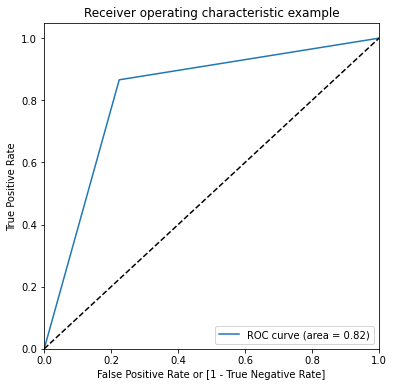

(array([0.        , 0.22407869, 1.        ]),
 array([0.        , 0.86595107, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [424]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.predicted)

#### We see an overall AUC score of 0.90 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Now apply PCA for dimentionality reduction.

# PCA

In [437]:

#Import Library for PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_train)
X_pca.shape

(80220, 25)

In [438]:
pca.components_

array([[ 0.13852049,  0.06814685,  0.08297222, ..., -0.02416528,
        -0.33421727, -0.00989567],
       [ 0.26815652,  0.1560219 ,  0.18139229, ..., -0.00780811,
         0.03416454, -0.021506  ],
       [-0.02154776,  0.06405741, -0.20376159, ...,  0.04232669,
        -0.00810421,  0.0408646 ],
       ...,
       [-0.03558197,  0.05759044,  0.04209808, ...,  0.04187912,
        -0.10645286, -0.05936229],
       [ 0.03059837,  0.15156913, -0.12643158, ...,  0.03415615,
        -0.03398098,  0.00149495],
       [ 0.10894807,  0.22093525, -0.23618471, ..., -0.03058177,
         0.08290391,  0.03443597]])

In [439]:
#Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([0.17343188, 0.15354771, 0.07482343, 0.05250067, 0.05059062,
       0.04118519, 0.04013675, 0.03495958, 0.03275997, 0.03124274,
       0.02833274, 0.02556596, 0.02353171, 0.02302192, 0.0205452 ,
       0.01982251, 0.01905999, 0.01623013, 0.01431416, 0.01344505,
       0.01308513, 0.01192713, 0.01162572, 0.01124248, 0.01051208])

In [440]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

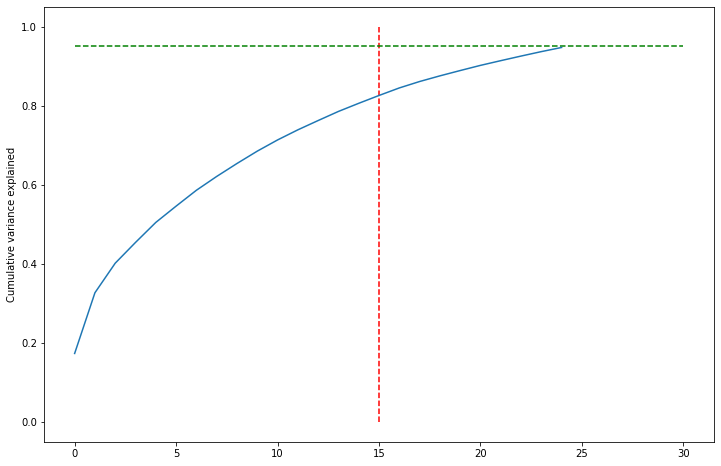

In [441]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**Observation**

Perform PCA with 15 components

In [442]:
#Import Library for Incremental PCA
from sklearn.decomposition import IncrementalPCA

In [443]:
pca_final = IncrementalPCA(n_components=15)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(80220, 15)

In [444]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(15, 15)

<AxesSubplot:>

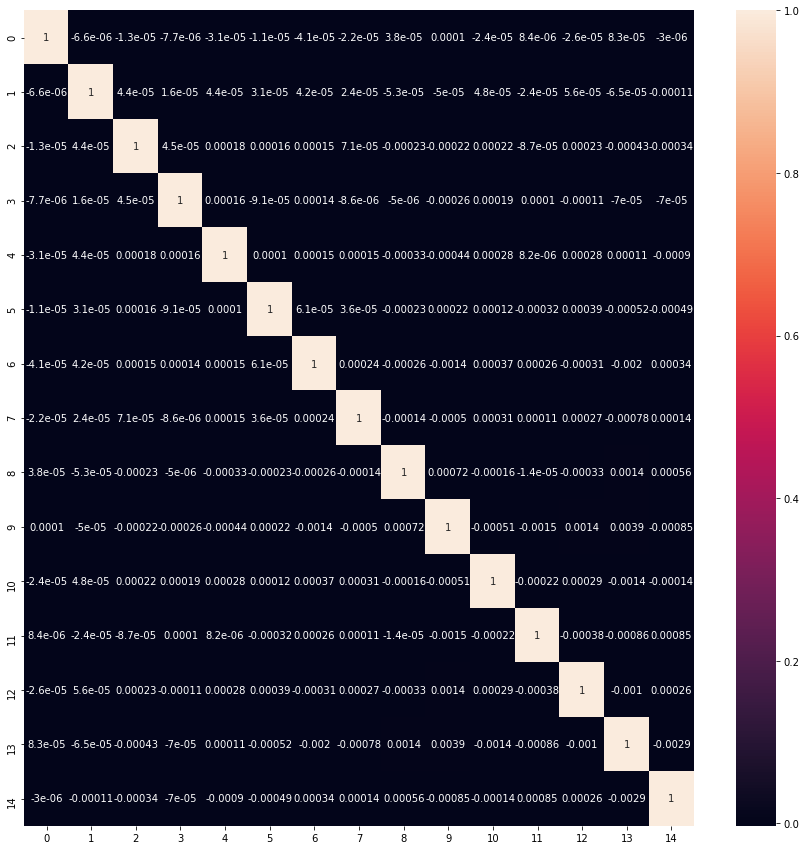

In [445]:
### Plotting the heatmap of the corr matrix
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [446]:
# Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(34380, 15)

## Applying logistic regression on the data on our Principal components¶

In [447]:
from sklearn.linear_model import LogisticRegression

In [448]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

In [449]:
#Making predictions on the test set
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

## We want to capture 90% of variance in PCA to improve the model

In [450]:
#Making it a little more unsupervised
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(80220, 21)

In [451]:
#Following it up with a logistic regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(34380, 21)

In [452]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.88'

In [453]:
pred_probs_train2 = model_pca2.predict_proba(df_train_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train2))

'0.88'

In [454]:
pred_probs_test2.sum()

17257.17568526156

In [455]:
y_test.sum()

17240

In [456]:
pred_probs_test2

array([0.82157431, 0.68731648, 0.81882707, ..., 0.79217101, 0.44721856,
       0.42694579])

In [472]:
# Predict the churn probability for test data using model_pca2 
y_test_pred = model_pca2.predict_proba(df_test_pca2)[:,1]

# Creating Prediction table for test data
y_test_pred_final = pd.DataFrame({'Churn':y_test.reshape(-1), 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = CustID
y_test_pred_final['Churn_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.821574,0.0,1
1,0,0.687316,1.0,1
2,1,0.818827,2.0,1
3,0,0.208473,3.0,0
4,1,0.775689,4.0,1


In [473]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

[[12964  4176]
 [ 2547 14693]]
0.8044502617801047


In [474]:
# Predictions DataFrame

In [475]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [476]:
sensitivity = TP/(TP+FN)
print("Sensitivity:",sensitivity)
specificity = TN/(TN + FP)
print("Specificity:",specificity)
FPR = 1 - specificity
print("FPR :",FPR)
FPR = FP /(FP + TN)
print("FPR:",FPR)
# positive predictive value (Predicting Churn correctly)
print ("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value (Predicting Non churn Correctly)
print ("Negative Predictive value",TN / float(TN+ FN))

Sensitivity: 0.8522621809744779
Specificity: 0.7563593932322054
FPR : 0.24364060676779464
FPR: 0.24364060676779464
Positive Predictive Value : 0.7786846149769463
Negative Predictive value 0.8357939526787441


In [478]:
# Predict the churn probability for train data using model_pca2 
y_train_pred = model_pca2.predict_proba(df_train_pca2)[:,1]

# Creating Prediction table for train data
y_train_pred_final = pd.DataFrame({'Churn':y_train.reshape(-1), 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = CustID
y_train_pred_final['Churn_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.819872,0.0,1
1,1,0.589150,1.0,1
2,1,0.890715,2.0,1
3,0,0.858370,3.0,1
4,0,0.062970,4.0,0


In [479]:
from sklearn import metrics

# Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion_train)
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[30657  9503]
 [ 5875 34185]]
0.8083021690351533


In [480]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [481]:
sensitivity = TP/(TP+FN)
print("Sensitivity:",sensitivity)
specificity = TN/(TN + FP)
print("Specificity:",specificity)
FPR = 1 - specificity
print("FPR :",FPR)
FPR = FP /(FP + TN)
print("FPR:",FPR)
# positive predictive value (Predicting Churn correctly)
print ("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value (Predicting Non churn Correctly)
print ("Negative Predictive value",TN / float(TN+ FN))

Sensitivity: 0.8533449825262107
Specificity: 0.7633715139442231
FPR : 0.2366284860557769
FPR: 0.23662848605577688
Positive Predictive Value : 0.78248031496063
Negative Predictive value 0.8391820869374794


# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [482]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.819872,0.0,1,1,1,1,1,1,1,1,1,1,0
1,1,0.589150,1.0,1,1,1,1,1,1,1,0,0,0,0
2,1,0.890715,2.0,1,1,1,1,1,1,1,1,1,1,0
3,0,0.858370,3.0,1,1,1,1,1,1,1,1,1,1,0
4,0,0.062970,4.0,0,1,0,0,0,0,0,0,0,0,0


In [483]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499377  1.000000  0.000000
0.1   0.1  0.660696  0.973739  0.348431
0.2   0.2  0.713874  0.950175  0.478162
0.3   0.3  0.754089  0.925212  0.583391
0.4   0.4  0.786462  0.895132  0.678063
0.5   0.5  0.808302  0.853345  0.763372
0.6   0.6  0.814946  0.791163  0.838670
0.7   0.7  0.804837  0.705667  0.903760
0.8   0.8  0.685802  0.414503  0.956424
0.9   0.9  0.549127  0.107214  0.989940


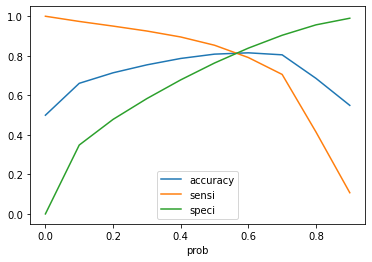

In [484]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.6 is the optimum point to take it as a cutoff probability.
### But we will consider 0.5 as optimal cutoff because we don't want to predict churn customer as unchurn

In [485]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.819872,0.0,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.589150,1.0,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.890715,2.0,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.858370,3.0,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.062970,4.0,0,1,0,0,0,0,0,0,0,0,0,0


In [486]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8083021690351533

# Read the Test data

In [487]:
test_data = pd.read_csv('test.csv')

In [488]:
test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [489]:
test_data.shape

(30000, 171)

In [490]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [491]:
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

# Find the % of missing values in each column
print(100*test_data.isnull().sum()/test_data.shape[0])

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.053333
std_og_t2o_mou               1.053333
loc_ic_t2o_mou               1.053333
last_date_of_month_6         0.000000
last_date_of_month_7         0.673333
last_date_of_month_8         1.223333
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.896667
onnet_mou_7                  3.906667
onnet_mou_8                  5.583333
offnet_mou_6                 3.896667
offnet_mou_7                 3.906667
offnet_mou_8                 5.583333
roam_ic_mou_6                3.896667
roam_ic_mou_7                3.906667
roam_ic_mou_8                5.583333
roam_og_mou_6                3.896667
roam_og_mou_7                3.906667
roam_og_mou_8                5.583333
loc_og_t2t_mou_6             3.896667
loc_og_t2t_mou_7             3.906667
loc_og_t2t_mou_8             5.583333
loc_og_t2m_m

In [492]:
# Display all the columns which has more than 70% of missing values
column_null = 100 * test_data.isnull().sum()/test_data.shape[0] 
column_null[column_null>70]

date_of_last_rech_data_6    74.716667
date_of_last_rech_data_7    74.313333
date_of_last_rech_data_8    73.593333
total_rech_data_6           74.716667
total_rech_data_7           74.313333
total_rech_data_8           73.593333
max_rech_data_6             74.716667
max_rech_data_7             74.313333
max_rech_data_8             73.593333
count_rech_2g_6             74.716667
count_rech_2g_7             74.313333
count_rech_2g_8             73.593333
count_rech_3g_6             74.716667
count_rech_3g_7             74.313333
count_rech_3g_8             73.593333
av_rech_amt_data_6          74.716667
av_rech_amt_data_7          74.313333
av_rech_amt_data_8          73.593333
arpu_3g_6                   74.716667
arpu_3g_7                   74.313333
arpu_3g_8                   73.593333
arpu_2g_6                   74.716667
arpu_2g_7                   74.313333
arpu_2g_8                   73.593333
night_pck_user_6            74.716667
night_pck_user_7            74.313333
night_pck_us

In [493]:
# Drop the columns which has more than 70% of missing values
test_data = test_data.drop(column_null[column_null>70].index,axis=1)

In [494]:
#Single value columns
single_value_columns = test_data.nunique()[test_data.nunique() == 1].index


In [495]:
# remove all the columns which has single value, we don't need those columns for our analysis

test_data = test_data.drop(single_value_columns,axis=1)

In [496]:
# Drop the date columns date_of_last_rech_6, date_of_last_rech_7,date_of_last_rech_8 which we don't want
date_list = ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']
test_data = test_data.drop(date_list,axis=1)

In [497]:
# Display the columns which has missing values
column_null = 100*test_data.isnull().sum()/test_data.shape[0]
null_col_name = column_null[column_null!=0].index
print(column_null[column_null!=0])
print(len(column_null[column_null!=0]))

onnet_mou_6         3.896667
onnet_mou_7         3.906667
onnet_mou_8         5.583333
offnet_mou_6        3.896667
offnet_mou_7        3.906667
offnet_mou_8        5.583333
roam_ic_mou_6       3.896667
roam_ic_mou_7       3.906667
roam_ic_mou_8       5.583333
roam_og_mou_6       3.896667
roam_og_mou_7       3.906667
roam_og_mou_8       5.583333
loc_og_t2t_mou_6    3.896667
loc_og_t2t_mou_7    3.906667
loc_og_t2t_mou_8    5.583333
loc_og_t2m_mou_6    3.896667
loc_og_t2m_mou_7    3.906667
loc_og_t2m_mou_8    5.583333
loc_og_t2f_mou_6    3.896667
loc_og_t2f_mou_7    3.906667
loc_og_t2f_mou_8    5.583333
loc_og_t2c_mou_6    3.896667
loc_og_t2c_mou_7    3.906667
loc_og_t2c_mou_8    5.583333
loc_og_mou_6        3.896667
loc_og_mou_7        3.906667
loc_og_mou_8        5.583333
std_og_t2t_mou_6    3.896667
std_og_t2t_mou_7    3.906667
std_og_t2t_mou_8    5.583333
std_og_t2m_mou_6    3.896667
std_og_t2m_mou_7    3.906667
std_og_t2m_mou_8    5.583333
std_og_t2f_mou_6    3.896667
std_og_t2f_mou

In [498]:
# Replace all the null values of the above columns with median value 
for i in null_col_name:
    median = test_data[i].median()
    test_data[i].fillna(median,inplace = True)

In [499]:
# Find the % of missing values in each column
print(100*test_data.isnull().sum()/test_data.shape[0])

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

# Feature Engineering for test data set

In [500]:
# Create total minutes of usage voice calls for June , July and August month - total_mou_6, total_mou_7,total_mou_8
test_data['total_mou_6'] =test_data['onnet_mou_6']+test_data['offnet_mou_6']
test_data['total_mou_7']= test_data['onnet_mou_7']+test_data['offnet_mou_7']
test_data['total_mou_8'] =test_data['onnet_mou_8']+test_data['offnet_mou_8']

# Drop 'onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8' because we already consider these columns
test_data = test_data.drop(['onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8'],axis = 1)

# Create total roam minutes of usage voice calls for June ,July and August month - total_roam_mou_6,total_roam_mou_7,total_roam_mou_8
test_data['total_roam_mou_6'] = test_data['roam_ic_mou_6'] + test_data['roam_og_mou_6']
test_data['total_roam_mou_7'] = test_data['roam_ic_mou_7'] + test_data['roam_og_mou_7']
test_data['total_roam_mou_8'] = test_data['roam_ic_mou_8'] + test_data['roam_og_mou_8']

# Drop 'roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8' because we already consider these columns
test_data = test_data.drop(['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8'],axis = 1)

# Drop 'loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6'
# Drop 'loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7'
# Drop 'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8'
# because we already consider these columns

test_data = test_data.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6'],axis = 1)

test_data = test_data.drop(['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7'],axis = 1)

test_data = test_data.drop(['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8'],axis = 1)


# Drop 'std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'
# Drop 'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'
# Drop 'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'
# because we already consider these columns

test_data = test_data.drop(['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],axis = 1)

test_data = test_data.drop(['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],axis = 1)

test_data = test_data.drop(['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],axis = 1)


 # Drop 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6','spl_og_mou_7', 'spl_og_mou_8', 
# 'og_others_6', 'og_others_7','og_others_8'

test_data = test_data.drop(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6','spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7','og_others_8'],axis = 1)


 # Drop 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8', 
# 'ic_others_6', 'ic_others_7','ic_others_8'

test_data = test_data.drop(['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_6', 'ic_others_7','ic_others_8'],axis = 1)


June_col = [s for s in test_data.columns if s.endswith('_6')]
July_col = [s for s in test_data.columns if s.endswith('_7')]
August_col = [s for s in test_data.columns if s.endswith('_8')]

for i,j in zip(June_col,July_col):
    name = i+'7'
    print(name," = ",i +" "+ j)

# Create variable for Average of June and July months data

for i,j in zip(June_col,July_col):
    name = "avg_"+i+'7'
    test_data[name] = (test_data[i] + test_data[j])/2

# Drop the columns which already considered columns 

test_data = test_data.drop(June_col, axis =1)
test_data = test_data.drop(July_col, axis =1)

# Consider variables the Average of June July data and August month data
month_67 = [s for s in test_data.columns if (s.endswith('_67'))]
month_8 = [s for s in test_data.columns if (s.endswith('_8')) ]

# Derive variables to find the difference between the (Average of June , July) and August

for i , j in zip(month_67,month_8):
    name = "diff_"+j.split('_8')[0]
    test_data[name] = test_data[i] - test_data[j]


arpu_67  =  arpu_6 arpu_7
loc_og_mou_67  =  loc_og_mou_6 loc_og_mou_7
std_og_mou_67  =  std_og_mou_6 std_og_mou_7
total_og_mou_67  =  total_og_mou_6 total_og_mou_7
loc_ic_mou_67  =  loc_ic_mou_6 loc_ic_mou_7
std_ic_mou_67  =  std_ic_mou_6 std_ic_mou_7
total_ic_mou_67  =  total_ic_mou_6 total_ic_mou_7
total_rech_num_67  =  total_rech_num_6 total_rech_num_7
total_rech_amt_67  =  total_rech_amt_6 total_rech_amt_7
max_rech_amt_67  =  max_rech_amt_6 max_rech_amt_7
last_day_rch_amt_67  =  last_day_rch_amt_6 last_day_rch_amt_7
vol_2g_mb_67  =  vol_2g_mb_6 vol_2g_mb_7
vol_3g_mb_67  =  vol_3g_mb_6 vol_3g_mb_7
monthly_2g_67  =  monthly_2g_6 monthly_2g_7
sachet_2g_67  =  sachet_2g_6 sachet_2g_7
monthly_3g_67  =  monthly_3g_6 monthly_3g_7
sachet_3g_67  =  sachet_3g_6 sachet_3g_7
total_mou_67  =  total_mou_6 total_mou_7
total_roam_mou_67  =  total_roam_mou_6 total_roam_mou_7


In [501]:
X_train.columns

Index(['arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'total_mou_8', 'total_roam_mou_8', 'avg_arpu_67',
       'avg_loc_og_mou_67', 'avg_std_og_mou_67', 'avg_total_og_mou_67',
       'avg_loc_ic_mou_67', 'avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_total_rech_num_67', 'avg_total_rech_amt_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avg_total_mou_67', 'avg_total_roam_mou_67',
       'diff_arpu', 'diff_loc_og_mou', 'diff_std_og_mou', 'diff_total_og_mou',
       'diff_loc_ic_mou', 'diff_std_ic_mou', 'diff_total_ic

In [502]:
 # Putting feature variable which we learned from training to X_final_test
X_final_test = test_data[X_train.columns]


## Feature Standardization for X_final_test

In [503]:

# Scaling all continuous independent variables by Standardization

# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler 
scaler = StandardScaler()

# Apply scaler to all the continuous independent variables
X_final_test = scaler.fit_transform(X_final_test)

# Predict the testdata using Logistic Regression Model model_pca2

In [504]:
# Use the pca_again model to predict the churn cases
df_test_pca2 = pca_again.transform(X_final_test)

#Predict the testdata using Logistic Regression Model model_pca2
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]


In [505]:
# Predict the churn probability for test data using model_pca2 
y_test_pred = model_pca2.predict_proba(df_test_pca2)[:,1]

In [ ]:
# Apply Logistic model on top of pca_again model

In [511]:
# Creating Prediction table for test data
y_test_pred_final = pd.DataFrame()
y_test_pred_final['ID'] = test_data['id']
y_test_pred_final['Churn_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,ID,Churn_Prob,predicted
0,69999,0.526964,1
1,70000,0.053938,0
2,70001,0.222327,0
3,70002,0.158410,0
4,70003,0.309538,0


In [512]:
y_test_pred_final['predicted'].sum()

8061

In [513]:
solution = y_test_pred_final
filename = 'solution_v3.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v3.csv


In [514]:
# Creating Prediction table for test data
y_test_pred_final = pd.DataFrame()
y_test_pred_final['ID'] = test_data['id']
y_test_pred_final['Churn_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.6 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final.head()

,ID,Churn_Prob,predicted
0,69999,0.526964,0
1,70000,0.053938,0
2,70001,0.222327,0
3,70002,0.158410,0
4,70003,0.309538,0


In [515]:
solution = y_test_pred_final
filename = 'solution_v4.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v4.csv


************************************************************************************************************************

# Decision Tree

In [518]:
# Take the pca applied train data of 90% variance
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(80220, 21)

In [519]:
# Transform the test data for pca
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(34380, 21)

In [520]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(df_train_pca2, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(df_train_pca2)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(df_test_pca2)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.881762652705061
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     17140
           1       0.83      0.87      0.85     17240

    accuracy                           0.85     34380
   macro avg       0.85      0.85      0.85     34380
weighted avg       0.85      0.85      0.85     34380



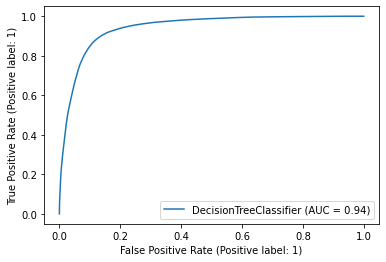

In [521]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt,df_train_pca2, y_train, drop_intermediate=False)
plt.show()

# Hyperparameter tuning

In [522]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(df_train_pca2, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [523]:
print("Best Score :",grid_search.best_score_)
# Best estimator
dt_best = grid_search.best_estimator_
print("Best Estimator",dt_best)

Best Score : 0.8680254300673149
Best Estimator DecisionTreeClassifier(max_depth=20, random_state=42)


In [524]:
y_train_pred = dt_best.predict(df_train_pca2)
y_test_pred = dt_best.predict(df_test_pca2)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     17140
           1       0.85      0.90      0.88     17240

    accuracy                           0.87     34380
   macro avg       0.88      0.87      0.87     34380
weighted avg       0.88      0.87      0.87     34380



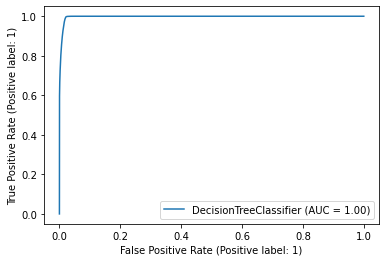

In [526]:
# ROC
plot_roc_curve(dt_best, df_train_pca2, y_train)
plt.show()

# Predict the test data using decision tree model

In [527]:
# Use the pca_again model to predict the churn cases
df_test_pca2 = pca_again.transform(X_final_test)

y_test_pred = dt_best.predict(df_test_pca2)


In [528]:
y_test_pred.shape

(30000,)

In [529]:
y_test_pred[0:20]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [533]:
y_test_pred.sum()

5090

In [530]:
y_test_pred_final = pd.DataFrame({'id':test_data['id'],"churn_probability":y_test_pred})

In [531]:
y_test_pred_final.head(20)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
5,70004,1
6,70005,1
7,70006,0
8,70007,0
9,70008,0


In [534]:
solution = y_test_pred_final
filename = 'solution_v5.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v5.csv


# Random Forest

### Use X_train and y_train data

Train accuracy : 0.924731987035652
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     17140
           1       0.91      0.90      0.91     17240

    accuracy                           0.91     34380
   macro avg       0.91      0.91      0.91     34380
weighted avg       0.91      0.91      0.91     34380



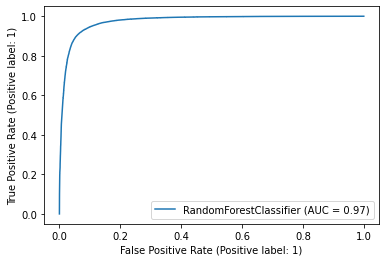

In [539]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf1.fit(X_train, y_train)

y_train_pred = rf1.predict(X_train)

# Train Accuracy

print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf1.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf1, X_train, y_train)
plt.show()

## Use df_train_pca2 and y_train data

In [537]:
# Take the pca applied train data of 90% variance
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

# Transform the test data for pca
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(34380, 21)

Train accuracy : 0.8821366242832211
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     17140
           1       0.86      0.86      0.86     17240

    accuracy                           0.86     34380
   macro avg       0.86      0.86      0.86     34380
weighted avg       0.86      0.86      0.86     34380



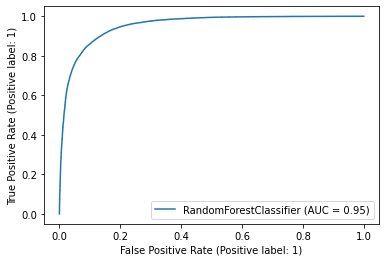

In [540]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf2.fit(df_train_pca2, y_train)

y_train_pred = rf2.predict(df_train_pca2)

# Train Accuracy


print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf2.predict(df_test_pca2)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf2, df_train_pca2, y_train)
plt.show()

# Hyper tuning for Random Forest 

## Using X_train and y_train

In [542]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [543]:
print("Best_score",grid_search.best_score_)
rf_best_raw = grid_search.best_estimator_

print("Best Estimator:",rf_best_raw)

Best_score 0.9340314136125654
Best Estimator: RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)


In [545]:
y_train_pred = rf_best_raw.predict(X_train)
y_test_pred = rf_best_raw.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17140
           1       0.94      0.94      0.94     17240

    accuracy                           0.94     34380
   macro avg       0.94      0.94      0.94     34380
weighted avg       0.94      0.94      0.94     34380



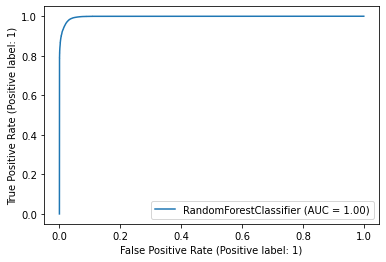

In [546]:
plot_roc_curve(rf_best_raw, X_train, y_train)
plt.show()

In [ ]:
# Using df_train_pca2 and y_train

In [547]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(df_train_pca2, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [548]:
print("Best_score",grid_search.best_score_)
rf_best_pca2 = grid_search.best_estimator_

print("Best Estimator:",rf_best_pca2)

Best_score 0.9033283470456245
Best Estimator: RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)


In [549]:
y_train_pred = rf_best_pca2.predict(df_train_pca2)
y_test_pred = rf_best_pca2.predict(df_test_pca2)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     17140
           1       0.90      0.92      0.91     17240

    accuracy                           0.91     34380
   macro avg       0.91      0.91      0.91     34380
weighted avg       0.91      0.91      0.91     34380



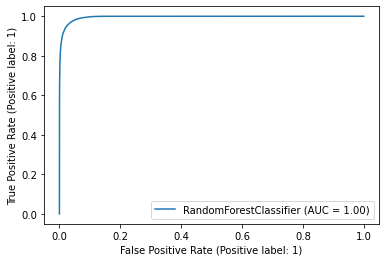

In [550]:
plot_roc_curve(rf_best_pca2, df_train_pca2, y_train)
plt.show()

# Predict the test data using Random Forest model

In [ ]:
#Predict using rf_best_raw

In [551]:
# Use the rf_best_raw model to predict the churn cases and use X_final_test data 

y_test_pred = rf_best_raw.predict(X_final_test)
y_test_pred_final = pd.DataFrame({'id':test_data['id'],"churn_probability":y_test_pred})
solution = y_test_pred_final
filename = 'solution_v6.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v6.csv


In [ ]:
# Predict using rf_best_pca2

In [552]:
# Use the pca_again model to predict the churn cases
df_test_pca2 = pca_again.transform(X_final_test)

y_test_pred = rf_best_pca2.predict(df_test_pca2)


In [553]:
y_test_pred_final = pd.DataFrame({'id':test_data['id'],"churn_probability":y_test_pred})

In [554]:
solution = y_test_pred_final
filename = 'solution_v7.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v7.csv


***************************************************************************************************

# Consider the data without resampling 

In [555]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Reshaping the y_train and y_test data 
y_train = y_train.values.reshape(-1,1)
y_test =y_test.values.reshape(-1,1)

In [556]:
#Capture 90% of variance by pca
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape


(44683, 22)

In [557]:
#Following it up with a logistic regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(19150, 22)

In [558]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))


'0.87'

In [559]:
pred_probs_train2 = model_pca2.predict_proba(df_train_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train2))


'0.87'

In [560]:
# Predict the churn probability for test data using model_pca2 
y_test_pred = model_pca2.predict_proba(df_test_pca2)[:,1]

# Creating Prediction table for test data
y_test_pred_final = pd.DataFrame({'Churn':y_test.reshape(-1), 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = CustID
y_test_pred_final['Churn_Prob'] = y_test_pred


In [563]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_test_pred_final.head()


,Churn,Churn_Prob,CustID,predicted
0,1,0.309894,0.0,1
1,0,0.015391,1.0,0
2,0,0.111509,2.0,0
3,0,0.171656,3.0,0
4,0,0.000520,4.0,0


In [564]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

# Predictions DataFrame
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
print("Sensitivity:",sensitivity)
specificity = TN/(TN + FP)
print("Specificity:",specificity)
FPR = 1 - specificity
print("FPR :",FPR)
FPR = FP /(FP + TN)
print("FPR:",FPR)
# positive predictive value (Predicting Churn correctly)
print ("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value (Predicting Non churn Correctly)
print ("Negative Predictive value",TN / float(TN+ FN))


[[15173  2030]
 [  504  1443]]
0.8676762402088772
Sensitivity: 0.7411402157164869
Specificity: 0.8819973260477824
FPR : 0.11800267395221764
FPR: 0.11800267395221764
Positive Predictive Value : 0.4154909300316729
Negative Predictive value 0.9678509918989603


# Random forest

In [565]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(df_train_pca2, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [566]:
print("Best_score",grid_search.best_score_)
rf_best_pca2 = grid_search.best_estimator_

print("Best Estimator:",rf_best_pca2)

Best_score 0.9192982140497276
Best Estimator: RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=25)


In [567]:
y_train_pred = rf_best_pca2.predict(df_train_pca2)
y_test_pred = rf_best_pca2.predict(df_test_pca2)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     17203
           1       0.71      0.37      0.49      1947

    accuracy                           0.92     19150
   macro avg       0.82      0.68      0.72     19150
weighted avg       0.91      0.92      0.91     19150



## Predict the final test data

In [791]:
# Use the pca_again model to predict the churn cases
df_test_pca2 = pca_again.transform(X_final_test)

y_test_pred = rf_best_pca2.predict(df_test_pca2)

y_test_pred_final = pd.DataFrame({'id':test_data['id'],"churn_probability":y_test_pred})

solution = y_test_pred_final
filename = 'solution_v8.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v8.csv


******************************************************************************************

# Feature Engineering for tel_data dataframe taken after missing value and outlier treatment without feature engineeerng

In [666]:
tel_data.shape

(63833, 126)

In [667]:
tel_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [668]:
# Feature Engineering
import warnings
warnings.filterwarnings("ignore")

# Create total minutes of usage voice calls for June , July and August month - total_mou_6, total_mou_7,total_mou_8
tel_data['total_mou_6'] =tel_data['onnet_mou_6']+tel_data['offnet_mou_6']
tel_data['total_mou_7']= tel_data['onnet_mou_7']+tel_data['offnet_mou_7']
tel_data['total_mou_8'] =tel_data['onnet_mou_8']+tel_data['offnet_mou_8']

# Drop 'onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8' because we already consider these columns
tel_data = tel_data.drop(['onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8'],axis = 1)

In [669]:
# Create total roam minutes of usage voice calls for June ,July and August month - total_roam_mou_6,total_roam_mou_7,total_roam_mou_8
tel_data['total_roam_mou_6'] = tel_data['roam_ic_mou_6'] + tel_data['roam_og_mou_6']
tel_data['total_roam_mou_7'] = tel_data['roam_ic_mou_7'] + tel_data['roam_og_mou_7']
tel_data['total_roam_mou_8'] = tel_data['roam_ic_mou_8'] + tel_data['roam_og_mou_8']

# Drop 'roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8' because we already consider these columns
tel_data = tel_data.drop(['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8'],axis = 1)

In [674]:
tel_data.columns[:50]

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6'],
      d

In [675]:
tel_data.columns[50:100]

Index(['loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8'],
     

In [676]:
tel_data.columns[100:]

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability', 'total_mou_6', 'total_mou_7', 'total_mou_8',
       'total_roam_mou_6', 'total_roam_mou_7', 'total_roam_mou_8'],
      dtype='object')

In [679]:
loc_June_col = [s for s in tel_data.columns if s.startswith('loc') and s.endswith('_6')]
std_June_col = [s for s in tel_data.columns if s.startswith('std') and s.endswith('_6')]
loc_July_col = [s for s in tel_data.columns if s.startswith('loc') and s.endswith('_7')]
std_July_col = [s for s in tel_data.columns if s.startswith('std') and s.endswith('_7')]
loc_Aug_col = [s for s in tel_data.columns if s.startswith('loc') and s.endswith('_8')]
std_Aug_col = [s for s in tel_data.columns if s.startswith('std') and s.endswith('_8')]

isd_June_col = [s for s in tel_data.columns if s.startswith('isd') and s.endswith('_6')]
isd_July_col = [s for s in tel_data.columns if s.startswith('isd') and s.endswith('_7')]
isd_Aug_col = [s for s in tel_data.columns if s.startswith('isd') and s.endswith('_8')]

spl_June_col = [s for s in tel_data.columns if s.startswith('spl') and s.endswith('_6')]
spl_July_col = [s for s in tel_data.columns if s.startswith('spl') and s.endswith('_7')]
spl_Aug_col = [s for s in tel_data.columns if s.startswith('spl') and s.endswith('_8')]

other_June_col = [s for s in tel_data.columns if "others" in s and s.endswith('_6')]
other_July_col = [s for s in tel_data.columns if "others" in s and s.endswith('_7')]
other_Aug_col = [s for s in tel_data.columns if "others" in s and s.endswith('_8')]

In [691]:
# Add all the local,std,isd,spl and other minutes of voic calls seperatly
tel_data['total_loc_mou_6'] = tel_data[loc_June_col].sum(axis =1)
tel_data['total_loc_mou_7'] = tel_data[loc_July_col].sum(axis =1)
tel_data['total_loc_mou_8'] = tel_data[loc_Aug_col].sum(axis =1)

tel_data['total_std_mou_6'] = tel_data[std_June_col].sum(axis =1)
tel_data['total_std_mou_7'] = tel_data[std_July_col].sum(axis =1)
tel_data['total_std_mou_8'] = tel_data[std_Aug_col].sum(axis =1)

tel_data['total_isd_mou_6'] = tel_data[isd_June_col].sum(axis =1)
tel_data['total_isd_mou_7'] = tel_data[isd_July_col].sum(axis =1)
tel_data['total_isd_mou_8'] = tel_data[isd_Aug_col].sum(axis =1)

tel_data['total_spl_mou_6'] = tel_data[spl_June_col].sum(axis =1)
tel_data['total_spl_mou_7'] = tel_data[spl_July_col].sum(axis =1)
tel_data['total_spl_mou_8'] = tel_data[spl_Aug_col].sum(axis =1)

tel_data['total_other_mou_6'] = tel_data[other_June_col].sum(axis =1)
tel_data['total_other_mou_7'] = tel_data[other_July_col].sum(axis =1)
tel_data['total_other_mou_8'] = tel_data[other_Aug_col].sum(axis =1)

In [692]:
# Drop the columns which already considered columns 

tel_data = tel_data.drop(loc_June_col, axis =1)
tel_data = tel_data.drop(loc_July_col, axis =1)
tel_data = tel_data.drop(loc_Aug_col, axis =1)

tel_data = tel_data.drop(std_June_col, axis =1)
tel_data = tel_data.drop(std_July_col, axis =1)
tel_data = tel_data.drop(std_Aug_col, axis =1)

tel_data = tel_data.drop(isd_June_col, axis =1)
tel_data = tel_data.drop(isd_July_col, axis =1)
tel_data = tel_data.drop(isd_Aug_col, axis =1)

tel_data = tel_data.drop(spl_June_col, axis =1)
tel_data = tel_data.drop(spl_July_col, axis =1)
tel_data = tel_data.drop(spl_Aug_col, axis =1)

tel_data = tel_data.drop(other_June_col, axis =1)
tel_data = tel_data.drop(other_July_col, axis =1)
tel_data = tel_data.drop(other_Aug_col, axis =1)


In [693]:
tel_data.shape

(63833, 66)

In [694]:
June_col = [s for s in tel_data.columns if s.endswith('_6')]
July_col = [s for s in tel_data.columns if s.endswith('_7')]
August_col = [s for s in tel_data.columns if s.endswith('_8')]

# Create variable for Average of July and August months data

for i,j in zip(July_col,August_col):
    name = "avg_"+i+'8'
    tel_data[name] = (tel_data[i] + tel_data[j])/2

# Drop the columns which already considered columns 

tel_data = tel_data.drop(July_col, axis =1)
tel_data = tel_data.drop(August_col, axis =1)

# Consider variables the Average of July data and August and June month data
month_78 = [s for s in tel_data.columns if (s.endswith('_78'))]
month_6 = [s for s in tel_data.columns if (s.endswith('_6')) ]

# Derive variables to find the difference between the (Average of July -August) and June

for i , j in zip(month_6,month_78):
    name = "diff_"+i.split('_6')[0]
    tel_data[name] = tel_data[i] - tel_data[j]


In [695]:
tel_data.columns

Index(['id', 'arpu_6', 'total_og_mou_6', 'total_ic_mou_6', 'total_rech_num_6',
       'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6',
       'monthly_3g_6', 'sachet_3g_6', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_mou_6', 'total_roam_mou_6',
       'total_loc_mou_6', 'total_std_mou_6', 'total_isd_mou_6',
       'total_spl_mou_6', 'total_other_mou_6', 'avg_arpu_78',
       'avg_total_og_mou_78', 'avg_total_ic_mou_78', 'avg_total_rech_num_78',
       'avg_total_rech_amt_78', 'avg_max_rech_amt_78',
       'avg_last_day_rch_amt_78', 'avg_vol_2g_mb_78', 'avg_vol_3g_mb_78',
       'avg_monthly_2g_78', 'avg_sachet_2g_78', 'avg_monthly_3g_78',
       'avg_sachet_3g_78', 'avg_total_mou_78', 'avg_total_roam_mou_78',
       'avg_total_loc_mou_78', 'avg_total_std_mou_78', 'avg_total_isd_mou_78',
       'avg_total_spl_mou_78', 'avg_total_other_mou_78', 'diff_arpu',
       'diff_

# Data Preparation

In [696]:
# Putting feature variable to X
X = tel_data.drop(['churn_probability','id'],axis=1)

# Putting response variable to y
y = tel_data['churn_probability']

feature_var = X.columns

## Feature Standardization

# Scaling all continuous independent variables by Standardization

# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler 
scaler = StandardScaler()

# Apply scaler to all the continuous independent variables
X = scaler.fit_transform(X)

# Splitting the data into train and test data 

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
# Reshaping the y_train and y_test data 
y_train = y_train.values.reshape(-1,1)
y_test =y_test.values.reshape(-1,1)


# Model Building

In [697]:
## We want to capture 90% of variance in PCA

#Making it a little more unsupervised
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

#Following it up with a logistic regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

# Predict the churn probability for test data using model_pca2 
y_test_pred = model_pca2.predict_proba(df_test_pca2)[:,1]

In [711]:
# Creating Prediction table for test data
y_test_pred_final = pd.DataFrame({'Churn':y_test.reshape(-1), 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = CustID
y_test_pred_final['Churn_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.3 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.309818,0.0,1
1,0,0.089177,1.0,0
2,0,0.168111,2.0,0
3,0,0.254107,3.0,1
4,0,0.000889,4.0,0


In [712]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

# Predictions DataFrame
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
print("Sensitivity:",sensitivity)
specificity = TN/(TN + FP)
print("Specificity:",specificity)
FPR = 1 - specificity
print("FPR :",FPR)
FPR = FP /(FP + TN)
print("FPR:",FPR)
# positive predictive value (Predicting Churn correctly)
print ("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value (Predicting Non churn Correctly)
print ("Negative Predictive value",TN / float(TN+ FN))

[[15313  1890]
 [  761  1186]]
0.8615665796344647
Sensitivity: 0.6091422701592193
Specificity: 0.8901354414927629
FPR : 0.10986455850723709
FPR: 0.10986455850723711
Positive Predictive Value : 0.3855656697009103
Negative Predictive value 0.9526564638546722


# Random Forest

In [713]:
# Random Forest

rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(df_train_pca2, y_train)


Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [714]:
print("Best_score",grid_search.best_score_)
rf_best_pca2 = grid_search.best_estimator_

print("Best Estimator:",rf_best_pca2)

y_train_pred = rf_best_pca2.predict(df_train_pca2)
y_test_pred = rf_best_pca2.predict(df_test_pca2)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))


Best_score 0.9088244020058653
Best Estimator: RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17203
           1       0.71      0.22      0.34      1947

    accuracy                           0.91     19150
   macro avg       0.81      0.60      0.64     19150
weighted avg       0.90      0.91      0.89     19150



# Handling Class Imbalance

In [715]:
# # Handling Class Imbalance
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resample, y_resample = sm.fit_resample(X, y)

In [716]:
# Splitting the data into train and test data 

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, train_size=0.7,test_size=0.3,random_state=100)
# Reshaping the y_train and y_test data 
y_train = y_train.values.reshape(-1,1)
y_test =y_test.values.reshape(-1,1)

In [717]:
## We want to capture 90% of variance in PCA

#Making it a little more unsupervised
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape


(80220, 23)

In [724]:
#Following it up with a logistic regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

# Predict the churn probability for test data using model_pca2 
y_test_pred = model_pca2.predict_proba(df_test_pca2)[:,1]

# Creating Prediction table for test data
y_test_pred_final = pd.DataFrame({'Churn':y_test.reshape(-1), 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = CustID
y_test_pred_final['Churn_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.348915,0.0,0
1,0,0.474234,1.0,0
2,1,0.762847,2.0,1
3,0,0.364135,3.0,0
4,1,0.535948,4.0,1


In [725]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

# Predictions DataFrame
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
print("Sensitivity:",sensitivity)
specificity = TN/(TN + FP)
print("Specificity:",specificity)
FPR = 1 - specificity
print("FPR :",FPR)
FPR = FP /(FP + TN)
print("FPR:",FPR)
# positive predictive value (Predicting Churn correctly)
print ("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value (Predicting Non churn Correctly)
print ("Negative Predictive value",TN / float(TN+ FN))


[[12286  4854]
 [ 3086 14154]]
0.7690517742873764
Sensitivity: 0.8209976798143852
Specificity: 0.7168028004667445
FPR : 0.2831971995332555
FPR: 0.28319719953325556
Positive Predictive Value : 0.7446338383838383
Negative Predictive value 0.7992453812125944


**Observation**

Not getting good accuracy after different feature engineering with resampling the dataset in Logistic Regression applied over PCA of 90% variance.

In [726]:
# Random Forest

rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(df_train_pca2, y_train)


print("Best_score",grid_search.best_score_)
rf_best_pca2 = grid_search.best_estimator_

print("Best Estimator:",rf_best_pca2)

y_train_pred = rf_best_pca2.predict(df_train_pca2)
y_test_pred = rf_best_pca2.predict(df_test_pca2)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))



Fitting 4 folds for each of 120 candidates, totalling 480 fits
Best_score 0.8878708551483421
Best Estimator: RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     17140
           1       0.89      0.90      0.90     17240

    accuracy                           0.90     34380
   macro avg       0.90      0.90      0.90     34380
weighted avg       0.90      0.90      0.90     34380



# Predict the churn cases for test dataset using the above model

In [761]:
test_data.shape

(30000, 102)

In [782]:

test_data = pd.read_csv('test.csv')
# Drop the columns which has more than 70% of missing values
test_data = test_data.drop(column_null[column_null>70].index,axis=1)
#Single value columns
single_value_columns = test_data.nunique()[test_data.nunique() == 1].index
# remove all the columns which has single value, we don't need those columns for our analysis

test_data = test_data.drop(single_value_columns,axis=1)

# Drop the date columns date_of_last_rech_6, date_of_last_rech_7,date_of_last_rech_8 which we don't want
date_list = ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']
test_data = test_data.drop(date_list,axis=1)

# Display the columns which has missing values
column_null = 100*test_data.isnull().sum()/test_data.shape[0]
null_col_name = column_null[column_null!=0].index
# Replace all the null values of the above columns with median value 

for i in null_col_name:
    median = test_data[i].median()
    test_data[i].fillna(median,inplace = True)



#### Feature Engineering for test data set

In [783]:
#f = open('D://test_feature_eng.txt')
#str_code = f.read()
#str_code = str_code.replace('tel_data','test_data')
#f.close()

In [784]:
# Feature Engineering

import warnings
warnings.filterwarnings("ignore")
# Create total minutes of usage voice calls for June , July and August month - total_mou_6, total_mou_7,total_mou_8
test_data['total_mou_6'] =test_data['onnet_mou_6']+test_data['offnet_mou_6']
test_data['total_mou_7']= test_data['onnet_mou_7']+test_data['offnet_mou_7']
test_data['total_mou_8'] =test_data['onnet_mou_8']+test_data['offnet_mou_8']

# Drop \'onnet_mou_6\',\'offnet_mou_6\',\'onnet_mou_7\',\'offnet_mou_7\',\'onnet_mou_8\',\'offnet_mou_8\' 
# because we already consider these columns\

test_data = test_data.drop(['onnet_mou_6','offnet_mou_6','onnet_mou_7','offnet_mou_7','onnet_mou_8','offnet_mou_8'],axis = 1)

# Create total roam minutes of usage voice calls for June ,July and August month - 
# total_roam_mou_6,total_roam_mou_7,total_roam_mou_8

test_data['total_roam_mou_6'] = test_data['roam_ic_mou_6'] + test_data['roam_og_mou_6']
test_data['total_roam_mou_7'] = test_data['roam_ic_mou_7'] + test_data['roam_og_mou_7']
test_data['total_roam_mou_8'] = test_data['roam_ic_mou_8'] + test_data['roam_og_mou_8']
# Drop \'roam_ic_mou_6\',\'roam_og_mou_6\',\'roam_ic_mou_7\',\'roam_og_mou_7\',\'roam_ic_mou_8\',\'roam_og_mou_8\' 
# because we already consider these columns

test_data = test_data.drop(['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8'],axis = 1)
loc_June_col = [s for s in test_data.columns if s.startswith('loc') and s.endswith('_6')]
std_June_col = [s for s in test_data.columns if s.startswith('std') and s.endswith('_6')]
loc_July_col = [s for s in test_data.columns if s.startswith('loc') and s.endswith('_7')]
std_July_col = [s for s in test_data.columns if s.startswith('std') and s.endswith('_7')]
loc_Aug_col = [s for s in test_data.columns if s.startswith('loc') and s.endswith('_8')]
std_Aug_col = [s for s in test_data.columns if s.startswith('std') and s.endswith('_8')]
isd_June_col = [s for s in test_data.columns if s.startswith('isd') and s.endswith('_6')]
isd_July_col = [s for s in test_data.columns if s.startswith('isd') and s.endswith('_7')]
isd_Aug_col = [s for s in test_data.columns if s.startswith('isd') and s.endswith('_8')]
spl_June_col = [s for s in test_data.columns if s.startswith('spl') and s.endswith('_6')]
spl_July_col = [s for s in test_data.columns if s.startswith('spl') and s.endswith('_7')]
spl_Aug_col = [s for s in test_data.columns if s.startswith('spl') and s.endswith('_8')]
other_June_col = [s for s in test_data.columns if "others" in s and s.endswith('_6')]
other_July_col = [s for s in test_data.columns if "others" in s and s.endswith('_7')]
other_Aug_col = [s for s in test_data.columns if "others" in s and s.endswith('_8')]
# Add all the local,std,isd,spl and other minutes of voic calls seperatly
test_data['total_loc_mou_6'] = test_data[loc_June_col].sum(axis =1)
test_data['total_loc_mou_7'] = test_data[loc_July_col].sum(axis =1)
test_data['total_loc_mou_8'] = test_data[loc_Aug_col].sum(axis =1)
test_data['total_std_mou_6'] = test_data[std_June_col].sum(axis =1)
test_data['total_std_mou_7'] = test_data[std_July_col].sum(axis =1)
test_data['total_std_mou_8'] = test_data[std_Aug_col].sum(axis =1)
test_data['total_isd_mou_6'] = test_data[isd_June_col].sum(axis =1)
test_data['total_isd_mou_7'] = test_data[isd_July_col].sum(axis =1)
test_data['total_isd_mou_8'] = test_data[isd_Aug_col].sum(axis =1)
test_data['total_spl_mou_6'] = test_data[spl_June_col].sum(axis =1)
test_data['total_spl_mou_7'] = test_data[spl_July_col].sum(axis =1)
test_data['total_spl_mou_8'] = test_data[spl_Aug_col].sum(axis =1)
test_data['total_other_mou_6'] = test_data[other_June_col].sum(axis =1)
test_data['total_other_mou_7'] = test_data[other_July_col].sum(axis =1)
test_data['total_other_mou_8'] = test_data[other_Aug_col].sum(axis =1)
# Drop the columns which already considered columns 
test_data = test_data.drop(loc_June_col, axis =1)
test_data = test_data.drop(loc_July_col, axis =1)
test_data = test_data.drop(loc_Aug_col, axis =1)
test_data = test_data.drop(std_June_col, axis =1)
test_data = test_data.drop(std_July_col, axis =1)
test_data = test_data.drop(std_Aug_col, axis =1)
test_data = test_data.drop(isd_June_col, axis =1)
test_data = test_data.drop(isd_July_col, axis =1)
test_data = test_data.drop(isd_Aug_col, axis =1)
test_data = test_data.drop(spl_June_col, axis =1)
test_data = test_data.drop(spl_July_col, axis =1)
test_data = test_data.drop(spl_Aug_col, axis =1)
test_data = test_data.drop(other_June_col, axis =1)
test_data = test_data.drop(other_July_col, axis =1)
test_data = test_data.drop(other_Aug_col, axis =1)
June_col = [s for s in test_data.columns if s.endswith('_6')]
July_col = [s for s in test_data.columns if s.endswith('_7')]
August_col = [s for s in test_data.columns if s.endswith('_8')]

# Create variable for Average of July and August months data
for i,j in zip(July_col,August_col):
    name = "avg_" + i +"8"
    test_data[name] = (test_data[i] + test_data[j])/2
    
# Drop the columns which already considered columns    
test_data = test_data.drop(July_col, axis =1)
test_data = test_data.drop(August_col, axis =1)

# Consider variables the Average of July data and August and June month data
month_78 = [s for s in test_data.columns if (s.endswith('_78'))]
month_6 = [s for s in test_data.columns if (s.endswith('_6')) ]
                                                          
# Derive variables to find the difference between the (Average of July -August) and June
for i , j in zip(month_6,month_78):
    name = "diff_"+i.split('_6')[0]
    test_data[name] = test_data[i] - test_data[j]

In [785]:
train_data.shape

(69999, 126)

In [779]:
feature_var

Index(['arpu_6', 'total_og_mou_6', 'total_ic_mou_6', 'total_rech_num_6',
       'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6',
       'monthly_3g_6', 'sachet_3g_6', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'total_mou_6', 'total_roam_mou_6', 'total_loc_mou_6',
       'total_std_mou_6', 'total_isd_mou_6', 'total_spl_mou_6',
       'total_other_mou_6', 'avg_arpu_78', 'avg_total_og_mou_78',
       'avg_total_ic_mou_78', 'avg_total_rech_num_78', 'avg_total_rech_amt_78',
       'avg_max_rech_amt_78', 'avg_last_day_rch_amt_78', 'avg_vol_2g_mb_78',
       'avg_vol_3g_mb_78', 'avg_monthly_2g_78', 'avg_sachet_2g_78',
       'avg_monthly_3g_78', 'avg_sachet_3g_78', 'avg_total_mou_78',
       'avg_total_roam_mou_78', 'avg_total_loc_mou_78', 'avg_total_std_mou_78',
       'avg_total_isd_mou_78', 'avg_total_spl_mou_78',
       'avg_total_other_mou_78', 'diff_arpu', 'diff_total_og_mou',
       'diff_total_

In [786]:
test_data.columns

Index(['id', 'arpu_6', 'total_og_mou_6', 'total_ic_mou_6', 'total_rech_num_6',
       'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6',
       'monthly_3g_6', 'sachet_3g_6', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'total_mou_6', 'total_roam_mou_6', 'total_loc_mou_6',
       'total_std_mou_6', 'total_isd_mou_6', 'total_spl_mou_6',
       'total_other_mou_6', 'avg_arpu_78', 'avg_total_og_mou_78',
       'avg_total_ic_mou_78', 'avg_total_rech_num_78', 'avg_total_rech_amt_78',
       'avg_max_rech_amt_78', 'avg_last_day_rch_amt_78', 'avg_vol_2g_mb_78',
       'avg_vol_3g_mb_78', 'avg_monthly_2g_78', 'avg_sachet_2g_78',
       'avg_monthly_3g_78', 'avg_sachet_3g_78', 'avg_total_mou_78',
       'avg_total_roam_mou_78', 'avg_total_loc_mou_78', 'avg_total_std_mou_78',
       'avg_total_isd_mou_78', 'avg_total_spl_mou_78',
       'avg_total_other_mou_78', 'diff_arpu', 'diff_total_og_mou',
       'diff_

In [787]:
 # Putting feature variable which we learned from training to X_final_test
X_final_test = test_data[feature_var]

# Scaling all continuous independent variables by Standardization

# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler 
scaler = StandardScaler()

# Apply scaler to all the continuous independent variables
X_final_test = scaler.fit_transform(X_final_test)

In [788]:
# Use the pca_again model to predict the churn cases
df_test_pca2 = pca_again.transform(X_final_test)

y_test_pred = rf_best_pca2.predict(df_test_pca2)
y_test_pred_final = pd.DataFrame({'id':test_data['id'],"churn_probability":y_test_pred})

solution = y_test_pred_final
filename = 'solution_v9.csv'
solution.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:solution_v9.csv


*******************************************************************************************************************************

# Coclusion1:

1. We applied RFE technique with StatesModel to find the imporatant feature variables
2. We used SMOTE library to handle imbalanced dataset.
3. We Build Logistic Regression, Decission Tree and Random forest models with PCA of 90% variance.
4. Among all the models Random forest model with PCA is giving good accuracy.
5. Solution-7 and Solution-9 are the predicted files of Random forest model with PCA by considering different derived features.
6. Both the models are giving 90% accuracy
7. The Kaggle gives 89% score for First Random Forest model predictions and 88% score for Second Random Forest model predictions for unseen test churn probability.

# Conclusion2:

1. In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators.

2. High profitable customers, who are regular in recharging, recharge with high amount, high usage of the services and they will prefer to take long term packages, the user who stay on network for very long time i.e, age on network is high
3. According to EDA analysis the important features are total incomming and outgoing minutes of usage of voice calls, average revenue per user, total recharge amount,local incoming and outgoing minutes of usage of voice calls.
4. If total recharge amount, total incomming and outgoing usage of voice calls are reducing means the user is going to churn.
5. If user reducing the use of services means the user may churn.
6. If the user has been on network less than 2 years are more likely to churn
7. The important features according to States model are local outgoing minutes of usage, total recharge amount, total incomming minutes of usage,age on network,total outgoing minutes of usage.
8. We can observe that most of the top 10 features are August month's data. Total recharge number got reduced,Total incoming call also reduced, Last day recharge amount also reduced, Less aged network people are more likely to churn
    

# Future Enhancement

1. We can change the feature engineering strategy for raw data to derive new features and then build model on that data to improve the result.

2. We can apply Clustering algorithm, Ada booster, and Ensemble techniques to improve the result.